<a href="https://colab.research.google.com/github/lomerrod/proyectofinalDS2/blob/main/ProyectoParteIII%2BRodriguezLorena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🪵🔥 PROYECTO EMPRESA DE VENTA DE LEÑA A HOGARES Y COMERCIOS 🚚🏠**

##**📌 0- Introducción y Definición del Problema**

###*0.1 Contexto*

La industria de distribución de leña juega un rol fundamental en el abastecimiento energético de hogares y comercios, especialmente en zonas donde la leña continúa siendo una fuente accesible de calefacción y cocina. En este contexto, las empresas proveedoras deben tomar decisiones estratégicas basadas en datos para mantenerse competitivas y rentables. Uno de los desafíos más importantes es anticipar la fuga de clientes, es decir, detectar aquellos clientes que dejan de comprar sin previo aviso.

###*0.2 Introducción*

La empresa analizada se dedica a la venta y distribución de leña, con una base de clientes compuesta tanto por consumidores residenciales como por comercios. Para abordar la problemática de la fuga de clientes, se dispone de un conjunto de datos históricos operativos que permite analizar el comportamiento de los usuarios y su interacción con la empresa.

Dicho conjunto incluye:

🧾 Datos de ventas y facturación

📦 Detalles de los productos vendidos

👤 Datos generales de clientes

📋 Resultados de encuestas de satisfacción

⚠️ Registros de reclamos realizados

💰 Información sobre deudas y morosidad

El análisis de estos datos permite no solo comprender mejor el comportamiento de los clientes, sino también desarrollar un modelo predictivo basado en técnicas de Machine Learning. Dicho modelo podrá anticipar la fuga de clientes, permitiendo a la empresa tomar medidas preventivas de fidelización y mejora del servicio.


**Observación:** *Si bien se dispone de información detallada en múltiples áreas (ventas, productos, reclamos, encuestas y deudas), no todos los clientes tienen información completa en todas las dimensiones. Por ejemplo, las encuestas solo fueron respondidas por una parte de los clientes, y los reclamos solo existen para quienes efectivamente realizaron uno. Esto será tenido en cuenta al momento de construir y analizar el dataset final.*

###*0.3 Objetivo*

El objetivo principal de este proyecto es predecir la fuga de clientes, definida como la ausencia de compras en los últimos seis meses, utilizando algoritmos de aprendizaje automático. A partir de esta predicción, la empresa podrá implementar estrategias de retención personalizadas, optimizar sus recursos comerciales y mantener una relación sólida con su base de clientes.

###*0.4 Preguntas e hipótesis de interés*

Pregunta 1:
¿Existe una relación entre la frecuencia de compras y el monto total gastado con la probabilidad de fuga?

Hipótesis 1:
Los clientes que compran con menor frecuencia y gastan menos tienen mayor probabilidad de abandonar la empresa.

---

Pregunta 2:
¿Los reclamos realizados por los clientes influyen en la probabilidad de que dejen de comprar?

Hipótesis 2:
Los clientes que presentan reclamos tienen una mayor tendencia a fugarse que aquellos que no los realizan.


---


Pregunta 3:
¿El nivel de satisfacción reportado (ya sea por encuestas o resolución de reclamos) se relaciona con la retención?

Hipótesis 3:
Clientes más satisfechos tienen una menor tasa de fuga.

*Alcance del análisis:*
Las hipótesis planteadas permiten explorar tanto el comportamiento transaccional como aspectos de experiencia del cliente (reclamos y satisfacción), lo cual brinda un enfoque integral del problema de fuga.

##**🗂️ 1- Preparación de la información**

###*1.1 Librerías*

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

###*1.2 Carga de los datasets*

In [2]:
# URL del archivo Excel en formato raw
file_url = "https://raw.githubusercontent.com/lomerrod/proyectofinalDS2/main/data.xlsx"

# Cargar el archivo
xls = pd.ExcelFile(file_url)

# Verificar los nombres de las hojas
print(xls.sheet_names)

['ventas', 'ventas_detalle', 'productos', 'cliente', 'encuesta2024', 'nc', 'deuda']


In [3]:
# Cargar las hojas
df_ventas = xls.parse('ventas')
df_ventas_detalle = xls.parse('ventas_detalle')
df_productos = xls.parse('productos')
df_cliente = xls.parse('cliente')
df_encuesta2024 = xls.parse('encuesta2024')
df_reclamos2024 = xls.parse('nc')
df_deuda = xls.parse('deuda')

Se verificaron los nombres de las hojas del archivo Excel y se confirmó la correcta importación de los datos desde la URL cruda de GitHub. Cada tabla representa una dimensión distinta del negocio que será integrada en etapas posteriores.

##**🔍 2- Primera aproximación a los datasets**

###*2.1 Visualización de las primeras filas de cada tabla*

In [4]:
df_ventas.head()

,FECHA DE FACTURACION,DOCUMENTO,COMPROBANTE,CLIENTE,TOTAL,FECHA DE ENTREGA,CHOFER
0,2022-01-01,FACTURA,32595,0012585,7950.0,2022-09-29,GASTON
1,2022-01-01,NOTA DE CREDITO,6584,0010141,-9528.0,2021-12-17,SANDOVAL
2,2022-01-01,NOTA DE CREDITO,11348,0012585,-7950.0,2022-07-23,GASTON
3,2022-01-03,FACTURA,25413,0009049,4950.0,2022-01-03,NICOLAS
4,2022-01-04,FACTURA,25457,0012253,3795.0,2022-01-04,NICOLAS


In [5]:
df_ventas_detalle.head()

,COMPROBANTE,CODIGO_PRODUCTO,CANTIDAD
0,32595,AS0004,1.0
1,6584,CO0027,-0.7
2,6584,AS0004,-0.3
3,11348,AS0004,-1.0
4,25413,AS0004,0.9


In [6]:
df_productos.head()

,CODIGO_PRODUCTO,PRODUCTO,UNIDAD,FAMILIA
0,AS0002,ASTILLA CALEFACCION CHICA,TON,AST
1,AS0003,ASTILLA CALEFACTOR,TON,AST
2,AS0004,ASTILLA ESTUFA,TON,AST
3,AS0005,ASTILLA GRANDE,TON,AST
4,AS0006,ASTILLON CHICO,TON,AST


In [7]:
df_cliente.head()

,CLIENTE,CLIENTE_NOMBRE,INGRESO,ZONA,TIPO DE VENTA,MEDIO,SEGMENTADOR
0,0000000,REPARTO,00:00:00,NaN,REPARTO,NaN,NaN
1,0000001,MOSTRADOR,00:00:00,NaN,MOSTRADOR,NaN,NaN
2,0000002,ARANCIBIA GONZALO,00:00:00,CARRASCO NORTE,REPARTO,NaN,CLIENTE DE REPARTO COMUN
3,0000003,ARANCIBIA BERNARDO (TATO),00:00:00,POCITOS,REPARTO,NaN,CLIENTE DE REPARTO COMUN
4,0000012,JORAJURIA GABRIELA,00:00:00,CARRASCO,REPARTO,NaN,CLIENTE DE REPARTO COMUN


In [8]:
df_encuesta2024.head()

,CLIENTE,ATENCION,CALIDAD,PLAZO_ACORDADO,CONTACTO,FACTOR_IMPORTANTE,VAL_PRECIO,VAL_CALIDAD,VAL_CANTIDAD,VAL_PUNTUALIDAD,VAL_ORDEN,VAL_PERSONAL,F_ENTREGA
0,0011420,3,3,Si,Publicidad en redes/televisión,Calidad de la leña,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
1,0006365,3,3,Si,Búsqueda en internet,Precio,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
2,0011707,3,3,Si,Visita a nuestras instalaciones (oficina o dep...,Precio,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
3,0010287,3,3,Si,Búsqueda en internet,Servicio telefónico y del personal,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
4,0012712,3,3,Si,Publicidad en redes/televisión,Calidad de la leña,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01


In [9]:
df_reclamos2024.head()

,Fecha de entrega,Fecha de reclamo,CLIENTE,CHOFER,Reclamo,Tipo de error,Nivel de disconformidad,Área afectada,Categoría,Visita Realizada,Medidas a tomar,Responsable,Fecha de cierre,Satisfaccion
0,2024-01-04,2024-01-08,11040,Tapia,NC,Error del proceso,Medio,Logística,Condiciones de entrega,No,Pedido adecuado en próxima entrega,LB,2024-01-08 00:00:00,Satisfecho
1,2024-01-08,2024-01-11,12141,Tapia,Reclamo que N/A,Error del proceso,Leve,Producción,Tipo de leña,No,No aplica,LB,2024-01-11 00:00:00,Satisfecho
2,2024-01-08,2024-01-15,13060,Nicolas,Sugerencia,Error del proceso,Medio,Producción,Tamaño de la leña,No,Leña adecuada en próximo pedido,IP,2024-01-18 00:00:00,Muy satisfecho
3,2024-01-08,2024-01-15,12526,Nicolas,NC,Error del proceso,Medio,Producción,Calidad de la leña,No,Regalo de leña Serrana,FP,2024-02-20 00:00:00,Satisfecho
4,2024-01-19,2024-01-19,12141,Tapia,NC,Error del proceso,Medio,Comercial,Tamaño de la leña,No,Nota de crédito,FP,2024-01-22 00:00:00,Muy satisfecho


In [10]:
df_deuda.head()

,CLIENTE,monto_deuda,dias_vencido
0,3831,8459,15
1,4966,14565,15
2,5342,12524,15
3,5582,21698,15
4,5752,7109,15


En el dataset de ventas (`df_ventas`) se observan tanto facturas (valores positivos en TOTAL) como notas de crédito (valores negativos).  
Esto es importante ya que algunas compras pueden haber sido anuladas posteriormente.

En las encuestas y reclamos, sólo hay información para clientes que respondieron efectivamente o que presentaron una queja, por lo tanto no representan a toda la base.

El dataset de clientes incluye zonas geográficas y datos comerciales que permitirán segmentar y analizar comportamiento de compra.

###*2.2 Información general de columnas y tipos de datos*

Se presentan los tipos de datos, cantidad de registros y columnas de cada dataframe para entender la estructura y completitud de los datos.

In [11]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17595 entries, 0 to 17594
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   FECHA DE FACTURACION  17595 non-null  datetime64[ns]
 1   DOCUMENTO             17595 non-null  object        
 2   COMPROBANTE           17595 non-null  int64         
 3   CLIENTE               17595 non-null  object        
 4   TOTAL                 17595 non-null  float64       
 5   FECHA DE ENTREGA      17595 non-null  datetime64[ns]
 6   CHOFER                17595 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 962.4+ KB


Tenemos 17595 filas y 7 columnas para el *dataframe de ventas*

In [12]:
df_ventas_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31428 entries, 0 to 31427
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   COMPROBANTE      31428 non-null  int64  
 1   CODIGO_PRODUCTO  31428 non-null  object 
 2   CANTIDAD         31428 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 736.7+ KB


Tenemos 31428 filas y 3 columnas para el *dataframe de ventas_detalle*

In [13]:
df_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODIGO_PRODUCTO  41 non-null     object
 1   PRODUCTO         41 non-null     object
 2   UNIDAD           41 non-null     object
 3   FAMILIA          41 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


Tenemos 41 filas y 4 columnas para el *dataframe de productos*

In [14]:
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9786 entries, 0 to 9785
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CLIENTE         9785 non-null   object
 1   CLIENTE_NOMBRE  9786 non-null   object
 2   INGRESO         9786 non-null   object
 3   ZONA            8783 non-null   object
 4   TIPO DE VENTA   9308 non-null   object
 5   MEDIO           2372 non-null   object
 6   SEGMENTADOR     9043 non-null   object
dtypes: object(7)
memory usage: 535.3+ KB


Tenemos 9786 filas y 7 columnas para el *dataframe de clientes*

In [15]:
df_encuesta2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CLIENTE            279 non-null    object        
 1   ATENCION           285 non-null    int64         
 2   CALIDAD            285 non-null    int64         
 3   PLAZO_ACORDADO     285 non-null    object        
 4   CONTACTO           285 non-null    object        
 5   FACTOR_IMPORTANTE  285 non-null    object        
 6   VAL_PRECIO         86 non-null     float64       
 7   VAL_CALIDAD        86 non-null     float64       
 8   VAL_CANTIDAD       86 non-null     float64       
 9   VAL_PUNTUALIDAD    86 non-null     float64       
 10  VAL_ORDEN          86 non-null     float64       
 11  VAL_PERSONAL       86 non-null     float64       
 12  F_ENTREGA          285 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usag

Tenemos 285 filas y 13 columnas para el *dataframe de encuesta*

In [16]:
df_reclamos2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Fecha de entrega         149 non-null    datetime64[ns]
 1   Fecha de reclamo         149 non-null    datetime64[ns]
 2   CLIENTE                  149 non-null    int64         
 3   CHOFER                   149 non-null    object        
 4   Reclamo                  149 non-null    object        
 5   Tipo de error            149 non-null    object        
 6   Nivel de disconformidad  149 non-null    object        
 7   Área afectada            149 non-null    object        
 8   Categoría                149 non-null    object        
 9   Visita Realizada         138 non-null    object        
 10  Medidas a tomar          149 non-null    object        
 11  Responsable              149 non-null    object        
 12  Fecha de cierre          149 non-nul

Tenemos 149 filas y 14 columnas para el *dataframe de reclamos*

In [17]:
df_deuda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   CLIENTE       41 non-null     int64
 1   monto_deuda   41 non-null     int64
 2   dias_vencido  41 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


Tenemos 41 filas y 3 columnas para el *dataframe de deuda*

###*2.3 Estadísticas numéricas básicas*


Se obtienen estadísticas descriptivas para las variables numéricas de cada dataset con el fin de identificar valores extremos, rangos y tendencias generales.

In [18]:
df_ventas.describe()

,FECHA DE FACTURACION,COMPROBANTE,TOTAL,FECHA DE ENTREGA
count,17595,17595.000000,17595.000000,17595
mean,2023-08-25 01:52:36.828644608,42940.270247,8060.773600,2023-08-25 08:24:13.503836160
min,2022-01-01 00:00:00,6538.000000,-362200.000000,2021-03-29 00:00:00
25%,2022-09-01 00:00:00,37001.500000,4500.000000,2022-09-02 00:00:00
50%,2023-08-18 00:00:00,43346.000000,7895.000000,2023-08-18 00:00:00
75%,2024-06-22 00:00:00,55014.500000,10225.000000,2024-06-22 00:00:00
max,2025-04-30 00:00:00,60596.000000,362200.000000,2025-05-02 00:00:00
std,NaN,11949.514767,9976.423831,NaN


In [19]:
df_ventas_detalle.describe()

,COMPROBANTE,CANTIDAD
count,31428.000000,31428.000000
mean,43499.945654,1.300381
std,12057.404122,6.134941
min,6538.000000,-200.000000
25%,37993.750000,0.500000
50%,44120.000000,0.500000
75%,55390.000000,1.000000
max,60596.000000,270.000000


In [20]:
df_encuesta2024.describe()

,ATENCION,CALIDAD,VAL_PRECIO,VAL_CALIDAD,VAL_CANTIDAD,VAL_PUNTUALIDAD,VAL_ORDEN,VAL_PERSONAL,F_ENTREGA
count,285.000000,285.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,285
mean,2.824561,2.754386,3.709302,4.569767,4.593023,4.790698,4.802326,4.720930,2024-05-16 22:24:00
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2024-01-01 00:00:00
25%,3.000000,3.000000,3.000000,4.000000,4.250000,5.000000,5.000000,5.000000,2024-04-01 00:00:00
50%,3.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2024-05-01 00:00:00
75%,3.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2024-07-01 00:00:00
max,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2024-12-01 00:00:00
std,0.456672,0.477696,0.956295,0.775215,0.872831,0.511429,0.647525,0.745988,NaN


In [21]:
df_deuda.describe()

,CLIENTE,monto_deuda,dias_vencido
count,41.000000,41.000000,41.000000
mean,9784.609756,15304.682927,43.170732
std,3173.803309,13330.477562,34.726721
min,296.000000,1000.000000,15.000000
25%,6984.000000,8459.000000,15.000000
50%,10544.000000,10375.000000,15.000000
75%,12451.000000,18916.000000,90.000000
max,13451.000000,59400.000000,90.000000


###*2.4 Verificar valores nulos*


In [22]:
df_ventas.isnull().sum()

,0
FECHA DE FACTURACION,0
DOCUMENTO,0
COMPROBANTE,0
CLIENTE,0
TOTAL,0
FECHA DE ENTREGA,0
CHOFER,0


In [23]:
df_cliente.isnull().sum()

,0
CLIENTE,1
CLIENTE_NOMBRE,0
INGRESO,0
ZONA,1003
TIPO DE VENTA,478
MEDIO,7414
SEGMENTADOR,743


In [24]:
df_encuesta2024.isnull().sum()

,0
CLIENTE,6
ATENCION,0
CALIDAD,0
PLAZO_ACORDADO,0
CONTACTO,0
FACTOR_IMPORTANTE,0
VAL_PRECIO,199
VAL_CALIDAD,199
VAL_CANTIDAD,199
VAL_PUNTUALIDAD,199


In [25]:
df_reclamos2024.isnull().sum()

,0
Fecha de entrega,0
Fecha de reclamo,0
CLIENTE,0
CHOFER,0
Reclamo,0
Tipo de error,0
Nivel de disconformidad,0
Área afectada,0
Categoría,0
Visita Realizada,11


###*2.5 Revisión de nombres de columnas*

In [26]:
df_ventas.columns

Index(['FECHA DE FACTURACION', 'DOCUMENTO', 'COMPROBANTE', 'CLIENTE', 'TOTAL',
       'FECHA DE ENTREGA', 'CHOFER'],
      dtype='object')

In [27]:
df_ventas_detalle.columns

Index(['COMPROBANTE', 'CODIGO_PRODUCTO', 'CANTIDAD'], dtype='object')

In [28]:
df_productos.columns

Index(['CODIGO_PRODUCTO', 'PRODUCTO', 'UNIDAD', 'FAMILIA'], dtype='object')

In [29]:
df_cliente.columns

Index(['CLIENTE', 'CLIENTE_NOMBRE', 'INGRESO', 'ZONA', 'TIPO DE VENTA',
       'MEDIO', 'SEGMENTADOR'],
      dtype='object')

In [30]:
df_encuesta2024.columns

Index(['CLIENTE', 'ATENCION', 'CALIDAD', 'PLAZO_ACORDADO', 'CONTACTO',
       'FACTOR_IMPORTANTE', 'VAL_PRECIO', 'VAL_CALIDAD', 'VAL_CANTIDAD',
       'VAL_PUNTUALIDAD', 'VAL_ORDEN', 'VAL_PERSONAL', 'F_ENTREGA'],
      dtype='object')

In [31]:
df_reclamos2024.columns

Index(['Fecha de entrega', 'Fecha de reclamo', 'CLIENTE', 'CHOFER', 'Reclamo',
       'Tipo de error', 'Nivel de disconformidad', 'Área afectada',
       'Categoría', 'Visita Realizada', 'Medidas a tomar', 'Responsable',
       'Fecha de cierre', 'Satisfaccion'],
      dtype='object')

In [32]:
df_deuda.columns

Index(['CLIENTE', 'monto_deuda', 'dias_vencido'], dtype='object')

Los nombres de columnas están en mayúsculas o con tildes, por lo que se procederá a estandarizarlos (pasar a mayúsculas sin tildes).

##**🧹 3- Data Wrangling**

###*3.1 Trasformación de headers y valores*

Para facilitar el procesamiento posterior y mantener consistencia en los nombres de columnas y valores de texto, se realiza la limpieza de:

- Encabezados (columnas): se convierten a mayúsculas y se eliminan tildes.
- Valores de texto: también se convierten a mayúsculas y sin tildes.

In [33]:
import unicodedata

# Funcion para convertir texto a mayusculas y quitar tildes de columnas
def limpiar_columna(col):
    col = col.upper()  # convertir a mayusculas
    col = unicodedata.normalize('NFKD', col).encode('ascii', 'ignore').decode('utf-8')  # eliminar tildes
    return col

# Aplicar limpieza de columnas a todos los dataframes
dfs = [df_ventas, df_ventas_detalle, df_productos, df_cliente, df_encuesta2024, df_reclamos2024, df_deuda]
for df in dfs:
    df.columns = [limpiar_columna(col) for col in df.columns]

# Funcion para limpiar cada valor de texto
def limpiar_valor(valor):
    if isinstance(valor, str):
        valor = valor.upper()
        valor = unicodedata.normalize('NFKD', valor).encode('ascii', 'ignore').decode('utf-8')
        return valor.strip()
    else:
        return valor

# Aplicar limpieza de valores a cada dataframe
def limpiar_dataframe(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].map(limpiar_valor)
    return df

# Aplicar a los dataframes
df_ventas = limpiar_dataframe(df_ventas)
df_cliente = limpiar_dataframe(df_cliente)
df_encuesta2024 = limpiar_dataframe(df_encuesta2024)
df_ventas_detalle = limpiar_dataframe(df_ventas_detalle)
df_productos = limpiar_dataframe(df_productos)
df_reclamos2024 = limpiar_dataframe(df_reclamos2024)
df_deuda = limpiar_dataframe(df_deuda)

In [34]:
# Ejemplo de un df con el cambio realizado

df_reclamos2024.head(2)

,FECHA DE ENTREGA,FECHA DE RECLAMO,CLIENTE,CHOFER,RECLAMO,TIPO DE ERROR,NIVEL DE DISCONFORMIDAD,AREA AFECTADA,CATEGORIA,VISITA REALIZADA,MEDIDAS A TOMAR,RESPONSABLE,FECHA DE CIERRE,SATISFACCION
0,2024-01-04,2024-01-08,11040,TAPIA,NC,ERROR DEL PROCESO,MEDIO,LOGISTICA,CONDICIONES DE ENTREGA,NO,PEDIDO ADECUADO EN PROXIMA ENTREGA,LB,2024-01-08 00:00:00,SATISFECHO
1,2024-01-08,2024-01-11,12141,TAPIA,RECLAMO QUE N/A,ERROR DEL PROCESO,LEVE,PRODUCCION,TIPO DE LENA,NO,NO APLICA,LB,2024-01-11 00:00:00,SATISFECHO


###*3.2 Trasformación de los tipos de datos*

Para evitar errores en futuras uniones y análisis, se transforman los campos clave como por ejemplo `CLIENTE` y `COMPROBANTE` a tipo `str`, y las fechas a `datetime`.

In [35]:
# Cambio de tipos
df_ventas["COMPROBANTE"] = df_ventas["COMPROBANTE"].astype(str)
df_ventas_detalle["COMPROBANTE"] = df_ventas_detalle["COMPROBANTE"].astype(str)
df_reclamos2024["CLIENTE"] = df_reclamos2024["CLIENTE"].astype(str)
df_deuda["CLIENTE"] = df_deuda["CLIENTE"].astype(str)

In [36]:
df_ventas.dtypes

,0
FECHA DE FACTURACION,datetime64[ns]
DOCUMENTO,object
COMPROBANTE,object
CLIENTE,object
TOTAL,float64
FECHA DE ENTREGA,datetime64[ns]
CHOFER,object


In [37]:
df_ventas_detalle.dtypes

,0
COMPROBANTE,object
CODIGO_PRODUCTO,object
CANTIDAD,float64


In [38]:
df_reclamos2024.dtypes

,0
FECHA DE ENTREGA,datetime64[ns]
FECHA DE RECLAMO,datetime64[ns]
CLIENTE,object
CHOFER,object
RECLAMO,object
TIPO DE ERROR,object
NIVEL DE DISCONFORMIDAD,object
AREA AFECTADA,object
CATEGORIA,object
VISITA REALIZADA,object


In [39]:
df_deuda.dtypes

,0
CLIENTE,object
MONTO_DEUDA,int64
DIAS_VENCIDO,int64


###*3.3 Normalización de datos*

Se normalizan los formatos de cliente (relleno de ceros) y se transforman valores categóricos en valores numéricos cuando corresponda.

In [40]:
# Asegurar consistencia en longitud de codigos de cliente
def padear_clientes(df, ancho=7):
    df = df.copy()
    df['CLIENTE'] = df['CLIENTE'].astype(str).str.zfill(ancho)
    return df

df_reclamos2024 = padear_clientes(df_reclamos2024)
df_deuda = padear_clientes(df_deuda)

# Codificar plazo acordado en df encuesta
df_encuesta2024['PLAZO_ACORDADO'] = df_encuesta2024['PLAZO_ACORDADO'].map({
    'SI': 1,
    'NO': 0,
    'NO APLICA': 1
})

In [41]:
df_encuesta2024

,CLIENTE,ATENCION,CALIDAD,PLAZO_ACORDADO,CONTACTO,FACTOR_IMPORTANTE,VAL_PRECIO,VAL_CALIDAD,VAL_CANTIDAD,VAL_PUNTUALIDAD,VAL_ORDEN,VAL_PERSONAL,F_ENTREGA
0,0011420,3,3,1,PUBLICIDAD EN REDES/TELEVISION,CALIDAD DE LA LENA,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
1,0006365,3,3,1,BUSQUEDA EN INTERNET,PRECIO,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
2,0011707,3,3,1,VISITA A NUESTRAS INSTALACIONES (OFICINA O DEP...,PRECIO,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
3,0010287,3,3,1,BUSQUEDA EN INTERNET,SERVICIO TELEFONICO Y DEL PERSONAL,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
4,0012712,3,3,1,PUBLICIDAD EN REDES/TELEVISION,CALIDAD DE LA LENA,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0011334,2,2,1,CLIENTE FRECUENTE,CALIDAD DE LA LENA,4.0,4.0,5.0,5.0,5.0,4.0,2024-12-01
281,0008491,3,3,1,CLIENTE FRECUENTE,EXPERIENCIA PREVIA POSITIVA,5.0,5.0,5.0,5.0,5.0,5.0,2024-12-01
282,0013509,3,3,1,CLIENTE FRECUENTE,EXPERIENCIA PREVIA POSITIVA,5.0,5.0,5.0,5.0,5.0,5.0,2024-12-01
283,0004413,3,3,1,CLIENTE FRECUENTE,CALIDAD DE LA LENA,5.0,5.0,5.0,5.0,5.0,5.0,2024-12-01


Se renombran zonas para unificar criterios (por ejemplo: "PEÑAROL - LAVALLEJA" y "peñarol" pasan a ser "PEÑAROL").


In [42]:
df_cliente['ZONA'].unique()

array([nan, 'CARRASCO NORTE', 'POCITOS', 'CARRASCO', 'PUNTA CARRETAS',
       'PRADO - NUEVO SAVONA', 'MALVIN', 'PARQUE MIRAMAR',
       'PARQUE CARRASCO', 'BUCEO', 'LOMAS DE CARRASCO', 'PUNTA GORDA',
       'LA TAHONA', 'CAPURRO - BELLA VISTA - ARROYO SECO', 'EL PINAR',
       'CERRITO DE LA VICTORIA', 'SOLYMAR',
       'PARQUE BATLLE - VILLA DOLORES', 'LAGOMAR', 'CENTRO',
       'PARQUE RODO', 'ABAYUBA', 'MALVIN NORTE', 'SHANGRILA',
       'BARRA DE CARRASCO', 'CORDON', 'LA BLANQUEADA', 'AEROPARQUE',
       'LA ASUNCION', 'REDUCTO', 'ATLANTIDA', 'PASO CARRASCO',
       'ATAHUALPA', 'UNION', 'AGUADA', 'LOMAS DE SOLYMAR', 'MALDONADO',
       'SAN JOSE DE CARRASCO', 'SAN NICOLAS', 'BANADOS DE CARRASCO',
       'CARMEL', 'COLINAS DE CARRASCO', 'MARONAS - PARQUE GUARANI',
       'BARROS BLANCOS', 'COSTA DESPUES MARQUEZ CASTRO', 'LA COMERCIAL',
       'PARQUE DE SOLYMAR', 'COLONIA NICOLICH', 'MONTEVIDEO NORTE',
       'COSTA HASTA MARQUEZ CASTRO', 'PALERMO', 'COLINAS DE SOLYMAR',
       'M

In [43]:
df_cliente['ZONA'].value_counts()

,count
ZONA,
CARRASCO,2102
POCITOS,570
LA TAHONA,561
CARRASCO NORTE,506
SOLYMAR,393
...,...
SAN JOSE,1
CASAVALLE,1
ZONA AMERICA,1


In [44]:
df_cliente['ZONA'] = df_cliente['ZONA'].replace({
    'PRADO - NUEVO SAVONA': 'PRADO',
    'COSTA DESPUES MARQUEZ CASTRO': 'EL PINAR',
    'MONTEVIDEO NORTE': 'MONTEVIDEO',
    'COSTA HASTA MARQUEZ CASTRO': 'SOLYMAR',
    'LAS CANTERAS': 'MALVIN NORTE',
    'CARRASCO SUR': 'CARRASCO',
    'PEÑARON - LAVALLEJA': 'PEÑAROL',
    'PARQUE BATLLE': 'PARQUE BATLLE - VILLA DOLORES',
    'PINAR': 'EL PINAR',
    'MALVIN SUR': 'MALVIN',
    'peñarol': 'PEÑAROL',
    'PARQUE RODO Y CORDON': 'PARQUE RODO',
    'OTROS': 'MONTEVIDEO',
    'CILINDRO': 'MERCADO MODELO - BOLIVAR',
    'LOMAS DE CARRASCO': 'LA TAHONA'
    })

In [45]:
df_cliente['ZONA'].value_counts()

,count
ZONA,
CARRASCO,2111
LA TAHONA,660
POCITOS,570
CARRASCO NORTE,506
SOLYMAR,422
...,...
SAN JOSE,1
CASAVALLE,1
ZONA AMERICA,1


Se procede a codificar la variable `SATISFACCION` de los reclamos, que originalmente es categórica, a un formato numérico ordinal para su posterior análisis y uso en modelos. La escala asignada refleja un orden lógico de mayor a menor satisfacción, permitiendo así calcular promedios, correlaciones y otras métricas estadísticas útiles.

- MUY SATISFECHO → 5  
- SATISFECHO → 4  
- S/D (Sin datos) → 3  
- INSATISFECHO → 2  
- MUY INSATISFECHO → 1  

In [46]:
df_reclamos2024['SATISFACCION'].unique()

array(['SATISFECHO', 'MUY SATISFECHO', 'MUY INSATISFECHO', nan, 'S/D',
       'INSATISFECHO'], dtype=object)

In [47]:
df_reclamos2024['SATISFACCION'] = df_reclamos2024['SATISFACCION'].map({
    'MUY SATISFECHO': 5,
    'SATISFECHO': 4,
    'S/D': 3,
    'INSATISFECHO': 2,
    'MUY INSATISFECHO': 1
}).astype('Int64')

In [48]:
df_reclamos2024['SATISFACCION'].unique()

<IntegerArray>
[4, 5, 1, <NA>, 3, 2]
Length: 6, dtype: Int64

###*3.4 Trasformación de los datos nulos*

Se imputan valores nulos según criterios razonables:
- Textos faltantes → “SIN ASIGNAR” o “N/A”
- Variables numéricas → media
- Categorías → modo o valor dominante

In [49]:
df_cliente.isnull().sum()

,0
CLIENTE,1
CLIENTE_NOMBRE,0
INGRESO,0
ZONA,1003
TIPO DE VENTA,478
MEDIO,7414
SEGMENTADOR,743


In [50]:
df_cliente['CLIENTE'] = df_cliente['CLIENTE'].fillna('N/A')
df_cliente['ZONA'] = df_cliente['ZONA'].fillna('SIN ASIGNAR')
df_cliente['TIPO DE VENTA'] = df_cliente['TIPO DE VENTA'].fillna('SIN ASIGNAR')
df_cliente['MEDIO'] = df_cliente['MEDIO'].fillna('SIN ASIGNAR')
df_cliente['SEGMENTADOR'] = df_cliente['SEGMENTADOR'].fillna('SIN ASIGNAR')

In [51]:
df_cliente.isnull().sum()

,0
CLIENTE,0
CLIENTE_NOMBRE,0
INGRESO,0
ZONA,0
TIPO DE VENTA,0
MEDIO,0
SEGMENTADOR,0


In [52]:
df_encuesta2024.isnull().sum()

,0
CLIENTE,6
ATENCION,0
CALIDAD,0
PLAZO_ACORDADO,0
CONTACTO,0
FACTOR_IMPORTANTE,0
VAL_PRECIO,199
VAL_CALIDAD,199
VAL_CANTIDAD,199
VAL_PUNTUALIDAD,199


In [53]:
df_encuesta2024['CLIENTE'] = df_encuesta2024['CLIENTE'].fillna('N/A')
for col in ['VAL_CALIDAD', 'VAL_PRECIO', 'VAL_CANTIDAD', 'VAL_PUNTUALIDAD', 'VAL_ORDEN', 'VAL_PERSONAL']:
    df_encuesta2024[col] = df_encuesta2024[col].fillna(df_encuesta2024[col].mean())

In [54]:
df_encuesta2024.isnull().sum()

,0
CLIENTE,0
ATENCION,0
CALIDAD,0
PLAZO_ACORDADO,0
CONTACTO,0
FACTOR_IMPORTANTE,0
VAL_PRECIO,0
VAL_CALIDAD,0
VAL_CANTIDAD,0
VAL_PUNTUALIDAD,0


In [55]:
df_reclamos2024.isnull().sum()

,0
FECHA DE ENTREGA,0
FECHA DE RECLAMO,0
CLIENTE,0
CHOFER,0
RECLAMO,0
TIPO DE ERROR,0
NIVEL DE DISCONFORMIDAD,0
AREA AFECTADA,0
CATEGORIA,0
VISITA REALIZADA,11


In [56]:
df_reclamos2024['VISITA REALIZADA'].unique()

array(['NO', 'SI', nan, 'S/D'], dtype=object)

In [57]:
df_reclamos2024['SATISFACCION'].unique()

<IntegerArray>
[4, 5, 1, <NA>, 3, 2]
Length: 6, dtype: Int64

In [58]:
df_reclamos2024['VISITA REALIZADA'] = df_reclamos2024['VISITA REALIZADA'].fillna('NO')
df_reclamos2024['SATISFACCION'] = df_reclamos2024['SATISFACCION'].astype(float).fillna(df_reclamos2024['SATISFACCION'].mean())

In [59]:
df_reclamos2024.isnull().sum()

,0
FECHA DE ENTREGA,0
FECHA DE RECLAMO,0
CLIENTE,0
CHOFER,0
RECLAMO,0
TIPO DE ERROR,0
NIVEL DE DISCONFORMIDAD,0
AREA AFECTADA,0
CATEGORIA,0
VISITA REALIZADA,0


In [60]:
df_deuda.isnull().sum()

,0
CLIENTE,0
MONTO_DEUDA,0
DIAS_VENCIDO,0


##**🛠️ 4- Feature Engineering**

###*4.1 Filtrado de facturas canceladas por notas de crédito*

Se define una función que elimina del dataset de ventas aquellas transacciones donde exista una factura y una nota de crédito con el mismo monto absoluto para un cliente dado, ya que se cancelan mutuamente y no representan compras reales.

In [61]:
def filtrar_compras_canceladas(df_ventas):
    df = df_ventas.copy()
    indices_a_eliminar = set()

    for cliente in df['CLIENTE'].unique():
      # Filtrar las ventas y devoluciones (notas de credito) del cliente
        df_cliente = df[df['CLIENTE'] == cliente]
        positivos = df_cliente[df_cliente['TOTAL'] > 0].copy() # Facturas
        negativos = df_cliente[df_cliente['TOTAL'] < 0].copy() # Notas de credito

        # Listas con indice, monto, chofer para comparar
        pos_vals = list(zip(positivos.index, positivos['TOTAL'], positivos['CHOFER']))
        neg_vals = list(zip(negativos.index, negativos['TOTAL'].abs(), negativos['CHOFER']))

        # Buscar pares de factura y nota de crédito con mismo monto y chofer
        for i, val_pos, chofer_pos in pos_vals:
            for j, val_neg, chofer_neg in neg_vals:
                mismo_monto = abs(val_pos - val_neg) < 1e-6
                mismo_chofer = chofer_pos == chofer_neg

                # Si coinciden, se marca para eliminar
                if mismo_monto and mismo_chofer and i not in indices_a_eliminar and j not in indices_a_eliminar:
                    indices_a_eliminar.add(i)
                    indices_a_eliminar.add(j)
                    break # Una nota de credito solo se aplica a una factura

    # Eliminar las transacciones canceladas
    df_filtrado = df.drop(index=indices_a_eliminar)
    return df_filtrado

# Aplicar la funcion
df_ventas_filtrado = filtrar_compras_canceladas(df_ventas)

In [62]:
df_ventas_filtrado

,FECHA DE FACTURACION,DOCUMENTO,COMPROBANTE,CLIENTE,TOTAL,FECHA DE ENTREGA,CHOFER
1,2022-01-01,NOTA DE CREDITO,6584,0010141,-9528.0,2021-12-17,SANDOVAL
3,2022-01-03,FACTURA,25413,0009049,4950.0,2022-01-03,NICOLAS
4,2022-01-04,FACTURA,25457,0012253,3795.0,2022-01-04,NICOLAS
5,2022-01-04,FACTURA,25473,0010795,5500.0,2022-01-05,NICOLAS
6,2022-01-04,FACTURA,25474,0012177,8775.0,2022-01-05,SANDOVAL
...,...,...,...,...,...,...,...
17589,2025-04-30,FACTURA,60593,0013447,3400.0,2025-05-02,GASTON
17590,2025-04-30,FACTURA,60594,0013636,12149.0,2025-05-02,TAPIA
17591,2025-04-30,FACTURA,60595,0007837,9975.0,2025-05-02,SANTIAGO
17592,2025-04-30,FACTURA,60596,F1117,402.0,2025-04-30,OTROS


Se actualiza el dataframe de detalles (`df_ventas_detalle`) para que contenga solo comprobantes válidos, es decir, los que no fueron eliminados en el paso anterior.

In [63]:
# Obtener los comprobantes validos del df filtrado
comprobantes_filtrados = df_ventas_filtrado['COMPROBANTE'].unique()

# Filtrar df_ventas_detalle usando esos comprobantes
df_ventas_detalle_filtrado = df_ventas_detalle[df_ventas_detalle['COMPROBANTE'].isin(comprobantes_filtrados)].copy()

df_ventas_detalle_filtrado

,COMPROBANTE,CODIGO_PRODUCTO,CANTIDAD
1,6584,CO0027,-0.70
2,6584,AS0004,-0.30
4,25413,AS0004,0.90
5,25457,DU0020,0.30
6,25457,RO0011,0.30
...,...,...,...
31421,60595,AS0003,0.50
31422,60595,AS0002,0.50
31423,60596,AS0004,0.03
31424,60596,DU0020,0.02


### *4.2 Frecuencia de compras y fechas clave*

Se calcula la cantidad de compras, la fecha de la primera y última compra y la cantidad de días en los que se compró.

In [64]:
# Agrupar las ventas por cliente, considerando solo facturas (monto positivo)
ventas_fecha = df_ventas_filtrado[df_ventas_filtrado['TOTAL'] > 0].groupby('CLIENTE').agg({
    'TOTAL': 'count', # Cantidad de compras realizadas
    'FECHA DE FACTURACION': ['min', 'max', 'nunique']
}).reset_index()

ventas_fecha.columns = ['CLIENTE', 'CANTIDAD_COMPRAS', 'FECHA_PRIMERA', 'FECHA_ULTIMA', 'DIAS_CONSUMO']

### *4.3 Indicador de cliente activo*

Se define si un cliente está activo, considerando como criterio si realizó una compra dentro de los últimos 18 meses desde la última fecha del dataset.

In [65]:
fecha_max = df_ventas_filtrado['FECHA DE FACTURACION'].max()

# Definir el umbral de actividad: 18 meses antes de la ultima compra registrada
umbral_activo = fecha_max - pd.DateOffset(months=18)

ventas_fecha['ACTIVO'] = ventas_fecha['FECHA_ULTIMA'] >= umbral_activo

### *4.4 Indicador de fuga (target)*

Se genera la variable objetivo (target), que indica si un cliente ha dejado de comprar por más de 6 meses pero aún se considera activo.

In [66]:
# Definir el umbral de actividad: 6 meses antes de la ultima compra registrada
umbral_fuga = fecha_max - pd.DateOffset(months=6)

ventas_fecha['FUGADO'] = ventas_fecha['FECHA_ULTIMA'] < umbral_fuga
ventas_fecha['FUGADO'] = ventas_fecha['FUGADO'] & ventas_fecha['ACTIVO']

### *4.5 Toneladas vendidas por cliente*

Se calcula la cantidad total de toneladas de leña compradas por cada cliente, considerando solo productos medidos en toneladas.

In [67]:
# Se hace merge entre ventas filtradas y detalle por comprobante
df_merge_ventas_detalle = df_ventas_filtrado.merge(df_ventas_detalle_filtrado, on='COMPROBANTE', how='inner')

# Se agrega informacion del producto (unidad, nombre, familia, etc.)
df_merge_completo = df_merge_ventas_detalle.merge(df_productos, on='CODIGO_PRODUCTO', how='left')

# Se rellenan posibles valores nulos en UNIDAD despues del merge
df_merge_completo['UNIDAD'] = df_merge_completo['UNIDAD'].fillna('')

# Se filtran solo productos medidos en toneladas
df_toneladas = df_merge_completo[df_merge_completo['UNIDAD'].str.lower().str.contains('ton')]

# Se agrupa por cliente y se suman las cantidades
toneladas_por_cliente = df_toneladas.groupby('CLIENTE')['CANTIDAD'].sum().reset_index(name='TONELADAS_COMPRADAS')

# Se obtienen todos los clientes unicos del dataframe original
clientes = df_ventas_filtrado['CLIENTE'].drop_duplicates()

# Se unen todos los clientes con sus toneladas (rellenando con 0 si no tiene)
df_ventas_resultado_completo = clientes.to_frame().merge(toneladas_por_cliente, on='CLIENTE', how='left').fillna(0)

# Se ordena el resultado por cliente de menor a mayor
df_ventas_resultado_completo = df_ventas_resultado_completo.sort_values(by='CLIENTE')

df_ventas_resultado_completo.head()

,CLIENTE,TONELADAS_COMPRADAS
2096,0000001,0.2
147,0000021,14.0
2241,0000031,1.0
1109,0000059,1.0
463,0000061,13.0


### *4.6 Promedio de toneladas vendidas por compra por cliente*

Relación entre el volumen comprado en toneladas y la frecuencia de compra.

In [68]:
df_toneladas_por_compra = toneladas_por_cliente.merge(ventas_fecha[['CLIENTE', 'CANTIDAD_COMPRAS']], on='CLIENTE', how='left')
df_toneladas_por_compra['TONELADAS_POR_COMPRA'] = df_toneladas_por_compra['TONELADAS_COMPRADAS'] / df_toneladas_por_compra['CANTIDAD_COMPRAS']

### *4.7 Montos totales por cliente*

Se calcula el monto total gastado por cada cliente, incluyendo el monto real (neto), el facturado sin devoluciones y el monto devuelto por notas de crédito.

In [69]:
# El total neto (ventas menos notas de credito)
total_neto = df_ventas.groupby('CLIENTE')['TOTAL'].sum().reset_index(name='TOTAL_NETO')

# El total facturado (solo montos positivos)
total_facturado = df_ventas[df_ventas['TOTAL'] > 0].groupby('CLIENTE')['TOTAL'].sum().reset_index(name='TOTAL_FACTURADO')

# El total de notas de credito (solo montos negativos)
total_devoluciones = df_ventas[df_ventas['TOTAL'] < 0].groupby('CLIENTE')['TOTAL'].sum().abs().reset_index(name='TOTAL_DEVOLUCIONES')

### *4.8 Satisfacción final promedio en reclamos*

Promedio del nivel de satisfacción reportado en reclamos por cada cliente.

In [70]:
satisfaccion_promedio = df_reclamos2024.groupby('CLIENTE')['SATISFACCION'].mean().reset_index(name='SATISFACCION_PROMEDIO')
clientes_con_reclamos = df_reclamos2024['CLIENTE'].unique()

###*4.9 Valoraciones promedio de encuesta*

Se calcula un índice promedio de satisfacción a partir de las valoraciones individuales de cada aspecto del servicio.

In [71]:
val_cols = ['VAL_PRECIO', 'VAL_CALIDAD', 'VAL_CANTIDAD', 'VAL_PUNTUALIDAD', 'VAL_ORDEN', 'VAL_PERSONAL']

for col in val_cols:
    df_encuesta2024[col] = pd.to_numeric(df_encuesta2024[col], errors='coerce')

encuesta_promedio = df_encuesta2024.groupby('CLIENTE')[val_cols].mean().reset_index()
encuesta_promedio['ENCUESTA_PROMEDIO'] = encuesta_promedio[val_cols].mean(axis=1)

### *4.10 Unión de todas las variables en un dataframe*

Se integran todas las métricas generadas en un único DataFrame, incluyendo variables demográficas del cliente y la creación de variables binarias que indican si respondió encuesta o tuvo reclamos.

In [72]:
# Creacion de dataframe
df_variables_final = ventas_fecha.merge(total_neto, on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(total_facturado, on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(total_devoluciones, on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(toneladas_por_cliente, on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(df_toneladas_por_compra[['CLIENTE', 'TONELADAS_POR_COMPRA']], on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(df_deuda[['CLIENTE', 'MONTO_DEUDA']], on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(satisfaccion_promedio, on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(encuesta_promedio[['CLIENTE', 'ENCUESTA_PROMEDIO']], on='CLIENTE', how='left')

# Generacion de variables binarias
df_variables_final['TIENE_RECLAMOS'] = df_variables_final['CLIENTE'].isin(clientes_con_reclamos).astype(int)
df_variables_final['RESPONDIO_ENCUESTA'] = df_variables_final['ENCUESTA_PROMEDIO'].notnull().astype(int)

df_variables_final = df_variables_final.merge(df_cliente[['CLIENTE', 'ZONA', 'SEGMENTADOR']], on='CLIENTE', how='left')

df_variables_final.isna().sum()

,0
CLIENTE,0
CANTIDAD_COMPRAS,0
FECHA_PRIMERA,0
FECHA_ULTIMA,0
DIAS_CONSUMO,0
ACTIVO,0
FUGADO,0
TOTAL_NETO,0
TOTAL_FACTURADO,0
TOTAL_DEVOLUCIONES,2263


In [73]:
# Rellenar valores nulos
df_variables_final['TONELADAS_COMPRADAS'] = df_variables_final['TONELADAS_COMPRADAS'].fillna(0)
df_variables_final['TOTAL_DEVOLUCIONES'] = df_variables_final['TOTAL_DEVOLUCIONES'].fillna(0)
df_variables_final['MONTO_DEUDA'] = df_variables_final['MONTO_DEUDA'].fillna(0)
df_variables_final['ZONA'] = df_variables_final['ZONA'].fillna('SIN ASIGNAR')
df_variables_final['SEGMENTADOR'] = df_variables_final['SEGMENTADOR'].fillna('SIN ASIGNAR')
df_variables_final['TONELADAS_POR_COMPRA'] = df_variables_final['TONELADAS_POR_COMPRA'].fillna(0)

In [74]:
df_variables_final.isna().sum()

,0
CLIENTE,0
CANTIDAD_COMPRAS,0
FECHA_PRIMERA,0
FECHA_ULTIMA,0
DIAS_CONSUMO,0
ACTIVO,0
FUGADO,0
TOTAL_NETO,0
TOTAL_FACTURADO,0
TOTAL_DEVOLUCIONES,0


## **📊 5- EDA**

Explorar y entender la distribución de los datos, identificar patrones relevantes, detectar outliers y observar relaciones entre variables que puedan ayudar a explicar el comportamiento de fuga de clientes.

In [75]:
# Estilo para utilizar en gráficos
plt.style.use('ggplot')
sns.set_style('whitegrid')

### *5.1 Análisis univariado*

####  *5.1.1 Distribución de clientes activos vs. inactivos*

Este gráfico muestra el porcentaje de clientes activos e inactivos. Es útil para entender si la base está concentrada en clientes que siguen comprando o si hay una cantidad significativa de clientes que han dejado de operar.

<ipython-input-76-f5afd69182e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_variables_final, x='ACTIVO_LABEL', palette='Greens', legend=False)


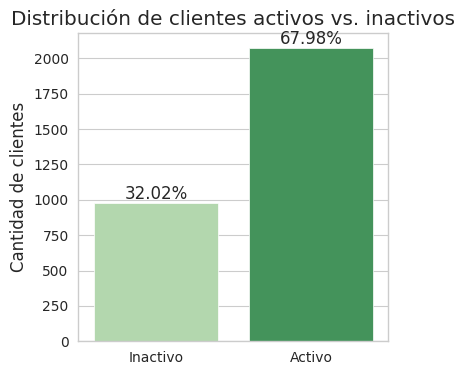

In [76]:
# Columna con etiquetas legibles
df_variables_final['ACTIVO_LABEL'] = df_variables_final['ACTIVO'].map({True: 'Activo', False: 'Inactivo'})

plt.figure(figsize=(4,4))
ax = sns.countplot(data=df_variables_final, x='ACTIVO_LABEL', palette='Greens', legend=False)
plt.title('Distribución de clientes activos vs. inactivos')
plt.xlabel('')
plt.ylabel('Cantidad de clientes')

# Agregar porcentaje sobre las barras
total = len(df_variables_final)
for p in ax.patches:
    porcentaje = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + total*0.01, porcentaje, ha='center', fontsize=12)

plt.show()

El análisis muestra que el 67,98% de los clientes se encuentran activos, es decir, realizaron al menos una compra dentro de los últimos 18 meses. Esto representa una base sólida de clientes recurrentes, aunque un 32,02% ya no está activo, lo cual señala una oportunidad de análisis más profundo sobre las razones de su inactividad.

####  *5.1.2 Distribución de clientes por zona*

Aquí vemos cuáles son las zonas con mayor cantidad de clientes. Esto puede ayudar a focalizar acciones comerciales o ver si la fuga está concentrada en ciertas regiones.

<ipython-input-77-8a643410d560>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_top20, x='ZONA', order=orden_zonas, palette=paleta_invertida)


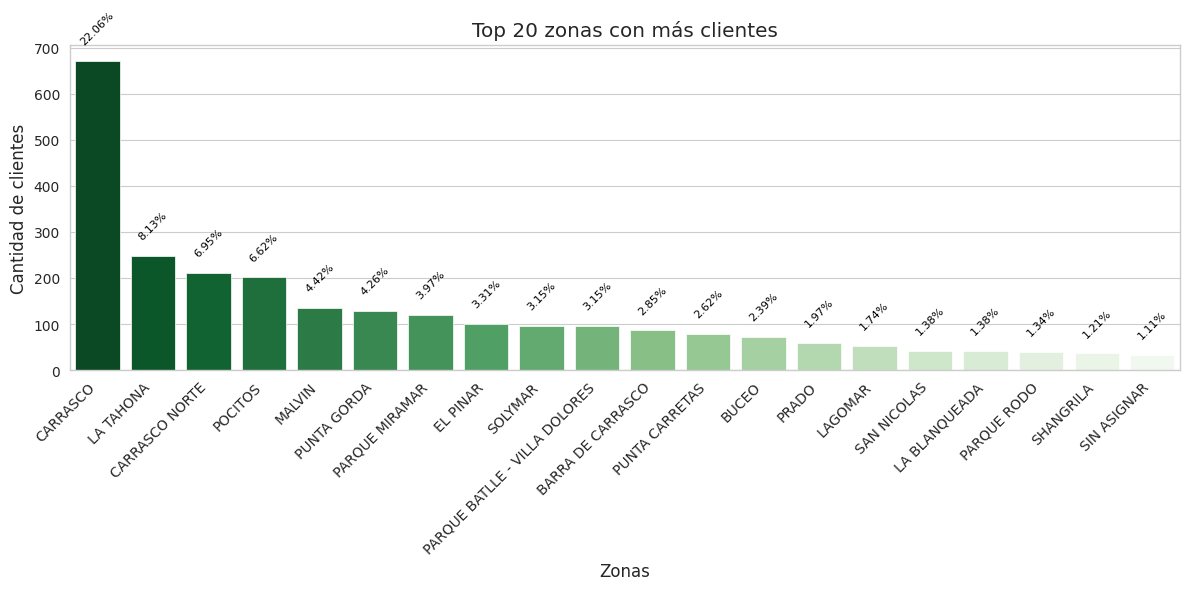

In [77]:
# Obtener los 20 valores más frecuentes de ZONA
zonas_top20 = df_variables_final['ZONA'].value_counts().nlargest(20).index

# Filtrar el DataFrame
df_top20 = df_variables_final[df_variables_final['ZONA'].isin(zonas_top20)]

# Reordenar los ejes en el gráfico
orden_zonas = df_top20['ZONA'].value_counts().index

# Crear paleta invertida (de oscuro a claro)
paleta_invertida = sns.color_palette('Greens', n_colors=20)[::-1]

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_top20, x='ZONA', order=orden_zonas, palette=paleta_invertida)
plt.title('Top 20 zonas con más clientes')
plt.xlabel('Zonas')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45, ha='right')

total = len(df_variables_final)
for p in ax.patches:
    porcentaje = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + total * 0.01
    ax.text(
        x, y, porcentaje,
        ha='center', va='bottom', fontsize=8,
        rotation=45,
        color='black'
    )

plt.tight_layout()
plt.show()

Al observar la procedencia geográfica de los clientes, se evidencia que las zonas con mayor concentración de clientes son:

- Carrasco: 22,06%
- La Tahona: 8,13%
- Carrasco Norte: 6,95%
- Pocitos: 6,62%
- Malvín: 4,42%

Estas cinco zonas concentran más del 48% del total de la cartera de clientes, lo que sugiere que representan áreas clave de operación comercial y pueden ser prioritarias para acciones de fidelización, retención o expansión del servicio.

####  *5.1.3 Distribución de la cantidad de compras por cliente*

Este boxplot nos permite identificar la distribución de compras y detectar valores atípicos. Clientes con muchas compras podrían tener un comportamiento diferente al resto, lo cual es útil para segmentarlos.

In [78]:
# Cálculo del IQR
q1 = df_variables_final['CANTIDAD_COMPRAS'].quantile(0.25)
q3 = df_variables_final['CANTIDAD_COMPRAS'].quantile(0.75)
iqr = q3 - q1

# Punto donde empiezan los outliers
limite_superior = q3 + 1.5 * iqr
print(f'Outliers empiezan a partir de: {limite_superior:.2f}')

Outliers empiezan a partir de: 11.00


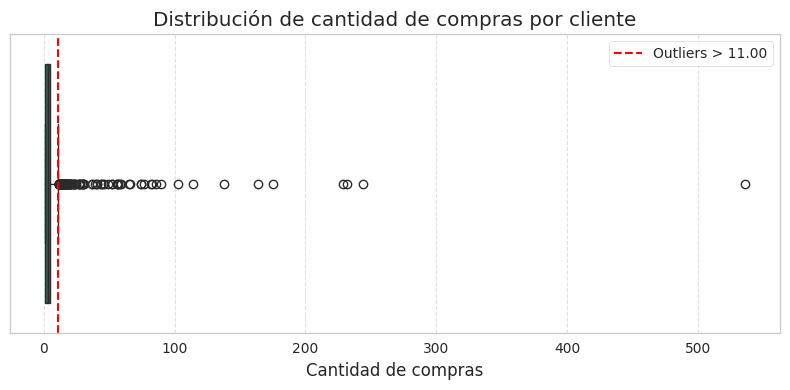

In [79]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_variables_final, x='CANTIDAD_COMPRAS', color='#276749')

# Linea vertical en el punto donde comienzan los outliers
plt.axvline(limite_superior, color='red', linestyle='--', label=f'Outliers > {limite_superior:.2f}')
plt.legend()

plt.title('Distribución de cantidad de compras por cliente')
plt.xlabel('Cantidad de compras')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

El análisis de la cantidad de compras por cliente muestra que la mayoría realiza menos de 11 compras durante el período analizado. A partir de ese punto, se consideran outliers, es decir, clientes con un comportamiento de compra significativamente superior al promedio.

Esto sugiere que hay distintos comportamientos de compra debido a los distintos segmentos de clientes que la empresa tiene, dado a que los mismos presentan otras necesidades de compra (Ejemplo: El consumo de los clientes finales no es de la misma magnitud que de un restaurante).

####  *5.1.4 Distribución de tipos de segmentación*

Esta visualización analiza la distribución de clientes según su tipo de segmentación. La columna “SEGMENTADOR” indica categorías comerciales como panaderías, estufas, clubes, pizzerías, entre otros. Analizar esta variable permite entender a qué tipo de cliente apunta más la empresa y detectar perfiles predominantes en la cartera.

<ipython-input-80-a95ef0a04aea>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=segmentador_counts.index, y=segmentador_counts.values, palette=paleta_invertida)
<ipython-input-80-a95ef0a04aea>:17: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  ax = sns.barplot(x=segmentador_counts.index, y=segmentador_counts.values, palette=paleta_invertida)


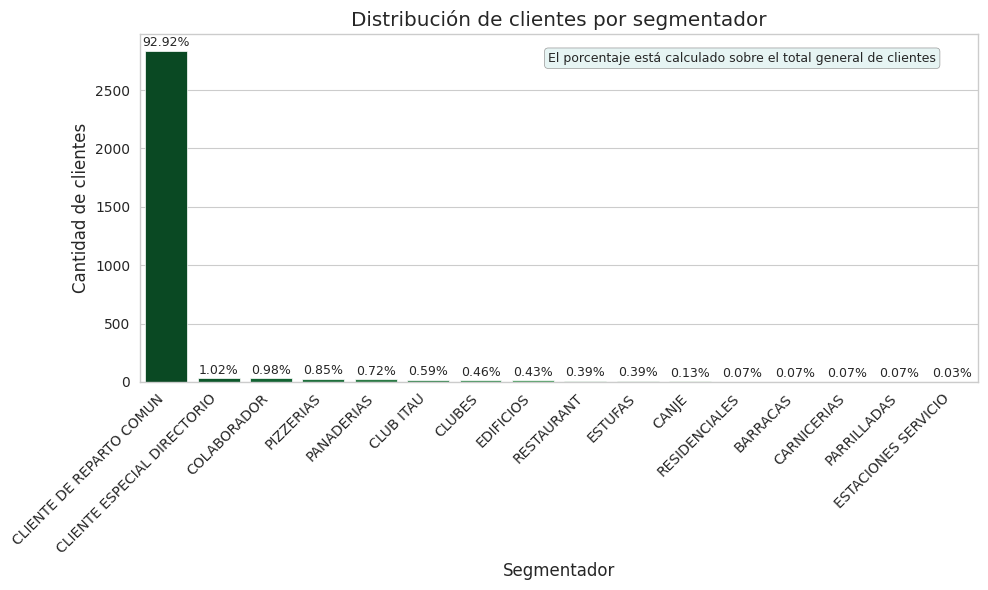

In [80]:
# Lista de segmentadores de interés
segmentadores_interes = [
    'CLIENTE DE REPARTO COMUN', 'BARRACAS', 'ESTUFAS', 'PANADERIAS',
    'COLABORADOR', 'CLIENTE ESPECIAL DIRECTORIO', 'PIZZERIAS', 'EDIFICIOS',
    'CLUBES', 'CLUB ITAU', 'RESTAURANT',  'RESIDENCIALES',
    'CANJE', 'CARNICERIAS', 'ESTACIONES SERVICIO', 'PARRILLADAS'
]

# Filtrar y contar clientes por segmento
segmentador_filtrado = df_variables_final[df_variables_final['SEGMENTADOR'].isin(segmentadores_interes)]
segmentador_counts = segmentador_filtrado['SEGMENTADOR'].value_counts().sort_values(ascending=False)

# Total general de clientes (no solo filtrados)
total_general = len(df_variables_final)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=segmentador_counts.index, y=segmentador_counts.values, palette=paleta_invertida)
plt.title('Distribución de clientes por segmentador')
plt.xlabel('Segmentador')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45, ha='right')

# Porcentaje basado en el total general
for i, value in enumerate(segmentador_counts.values):
    porcentaje = f'{100 * value / total_general:.2f}%'
    ax.text(i, value + total_general * 0.005, porcentaje, ha='center', va='bottom', fontsize=9)

# Cuadro de texto aclaratorio
plt.text(
    0.95, 0.95,
    'El porcentaje está calculado sobre el total general de clientes',
    transform=ax.transAxes,
    fontsize=9,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='#e0f2f1', edgecolor='gray', alpha=0.8)
)

plt.tight_layout()
plt.show()

La mayoría de los clientes pertenecen al segmento "CLIENTE DE REPARTO COMÚN", representando casi la cartera total.

Esto evidencia que el perfil más frecuente es el cliente tradicional del servicio de reparto, mientras que de comercios los más frecuentes son pizzerías y panaderías. Este conocimiento es clave para definir estrategias personalizadas de retención y marketing.

### *5.2 Análisis bivariado*

#### *5.2.1 Distribución de clientes activos vs fugados*

Este gráfico explora la relación entre la actividad actual de los clientes (si están activos o no) y su condición de fuga (si dejaron de comprar en los últimos 6 meses). Esta comparación permite identificar qué proporción de los clientes activos ya se consideran fugados, lo cual es clave para la segmentación y estrategias de retención.

Tabla de porcentaje por fila:
 FUGADO      False     True 
ACTIVO                     
False   100.00000   0.00000
True     39.24783  60.75217


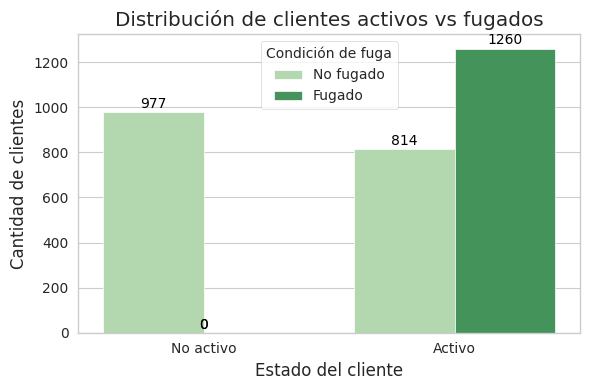

In [81]:
# Tabla de porcentaje cruzada entre ACTIVO y FUGADO
ct = pd.crosstab(ventas_fecha['ACTIVO'], ventas_fecha['FUGADO'], normalize='index') * 100
print("Tabla de porcentaje por fila:\n", ct)

plt.figure(figsize=(6,4))

ax = sns.countplot(
    data=df_variables_final,
    x=df_variables_final['ACTIVO'].map({True: 'Activo', False: 'No activo'}),
    hue=df_variables_final['FUGADO'].map({True: 'Fugado', False: 'No fugado'}),
    palette='Greens'
)

plt.title('Distribución de clientes activos vs fugados')
plt.xlabel('Estado del cliente')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Condición de fuga')

# Agregar etiquetas con el recuento encima de cada barra
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.text(x, height + 5,  # 5 unidades arriba de la barra para que no se superponga
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black')

plt.tight_layout()
plt.show()

Esto significa que todos los clientes inactivos no fueron considerados fugados, probablemente porque no están en condiciones de compra desde hace más de 18 meses.

Sin embargo, dentro de los clientes activos, un 60,75% ya se considera fugado (no ha comprado en los últimos 6 meses), lo cual es un hallazgo importante: la fuga no está exclusivamente en clientes antiguos o inactivos, sino también entre quienes aún podrían seguir comprando.
Esto revela una oportunidad para que la empresa actúe preventivamente sobre clientes activos pero en riesgo de fuga.

#### *5.2.2 Relación entre toneladas por compra y cantidad de compras por cliente*

En este gráfico se analiza la relación entre la frecuencia de compras (cantidad de compras realizadas por cliente) y el promedio de toneladas compradas por transacción. El objetivo es observar si hay algún patrón en cuanto al tipo de cliente: por ejemplo, si quienes compran más veces tienden a comprar en menor cantidad o viceversa. Se identifican también los valores atípicos (outliers) para entender mejor los extremos del comportamiento.

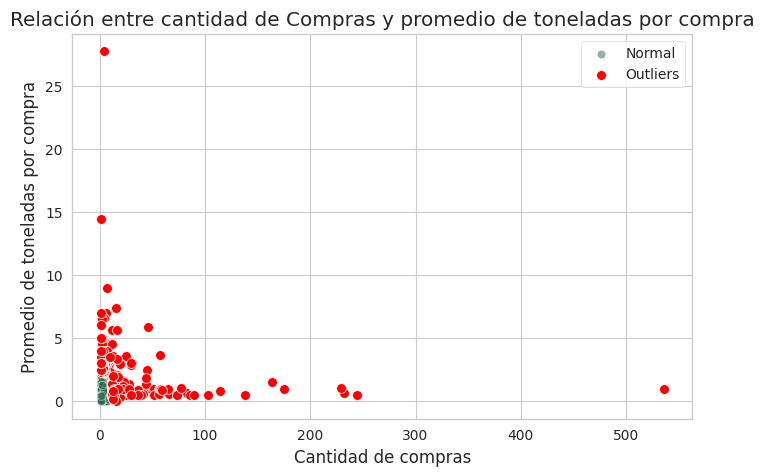

In [82]:
# Calcular los cuartiles y el IQR para cada variable
Q1_x = df_variables_final['CANTIDAD_COMPRAS'].quantile(0.25)
Q3_x = df_variables_final['CANTIDAD_COMPRAS'].quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = df_variables_final['TONELADAS_POR_COMPRA'].quantile(0.25)
Q3_y = df_variables_final['TONELADAS_POR_COMPRA'].quantile(0.75)
IQR_y = Q3_y - Q1_y

# Definir límites para outliers
lower_bound_x = Q1_x - 1.5 * IQR_x
upper_bound_x = Q3_x + 1.5 * IQR_x

lower_bound_y = Q1_y - 1.5 * IQR_y
upper_bound_y = Q3_y + 1.5 * IQR_y

# Crear una máscara para los outliers en cualquiera de los dos ejes
outliers = ((df_variables_final['CANTIDAD_COMPRAS'] < lower_bound_x) |
            (df_variables_final['CANTIDAD_COMPRAS'] > upper_bound_x) |
            (df_variables_final['TONELADAS_POR_COMPRA'] < lower_bound_y) |
            (df_variables_final['TONELADAS_POR_COMPRA'] > upper_bound_y))

plt.figure(figsize=(8,5))
# Graficar todos los puntos normales
sns.scatterplot(data=df_variables_final[~outliers],
                x='CANTIDAD_COMPRAS', y='TONELADAS_POR_COMPRA',
                alpha=0.5, color='#276749', label='Normal')

# Graficar los outliers en otro color y tamaño
sns.scatterplot(data=df_variables_final[outliers],
                x='CANTIDAD_COMPRAS', y='TONELADAS_POR_COMPRA',
                color='red', s=50, label='Outliers')

plt.title('Relación entre cantidad de Compras y promedio de toneladas por compra')
plt.xlabel('Cantidad de compras')
plt.ylabel('Promedio de toneladas por compra')
plt.legend()
plt.show()

Se observa una concentración importante de clientes con pocas compras y un bajo volumen promedio por transacción.

La nube de puntos tiende a dispersarse más en compradores frecuentes, lo que sugiere que los patrones de compra son más variados en estos casos.

Los outliers se identifican claramente: algunos clientes hacen pocas compras pero de alto volumen (posiblemente grandes clientes o comercios), y otros compran con mucha frecuencia pero en pequeñas cantidades.

#### *5.2.3 Relación entre toneladas compradas y zona*

Este gráfico muestra el total de toneladas compradas agrupadas por zona geográfica, destacando las 20 zonas con mayor volumen de compra. El objetivo es identificar cuáles son las zonas que concentran la mayor cantidad de toneladas compradas y analizar su participación relativa dentro del total.

<ipython-input-84-83c91c1ea24d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=zonas_top20.index, y=zonas_top20.values, palette=paleta_invertida)


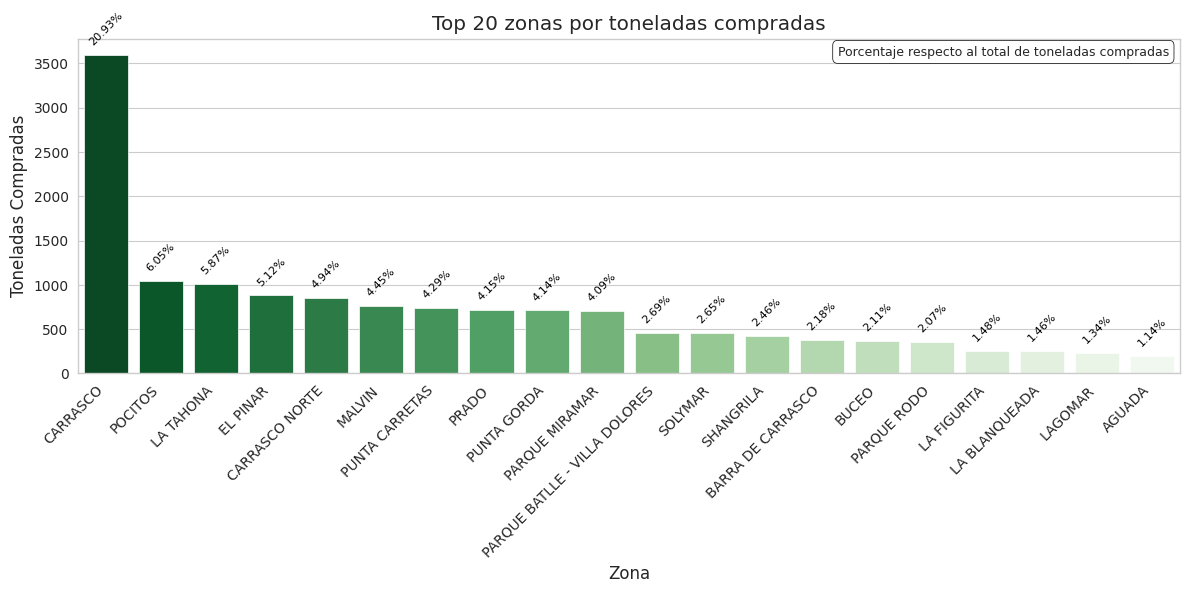

In [84]:
# Agrupar por zona y sumar toneladas compradas
zonas_toneladas = df_variables_final.groupby('ZONA')['TONELADAS_COMPRADAS'].sum()

# Ordenar de mayor a menor y tomar las primeras 20
zonas_top20 = zonas_toneladas.sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=zonas_top20.index, y=zonas_top20.values, palette=paleta_invertida)
plt.title('Top 20 zonas por toneladas compradas')
plt.xlabel('Zona')
plt.ylabel('Toneladas Compradas')
plt.xticks(rotation=45, ha='right')

# Agregar porcentaje sobre cada barra (respecto del total de toneladas compradas)
total_toneladas = df_variables_final['TONELADAS_COMPRADAS'].sum()
for i, p in enumerate(ax.patches):
    porcentaje = f'{100 * p.get_height() / total_toneladas:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + total_toneladas * 0.005  # pequeño margen
    ax.text(
        x, y, porcentaje,
        ha='center', va='bottom', fontsize=8,
        rotation=45,
        color='black'
    )

# Cuadro de texto aclaratorio
plt.text(
    0.99, 0.95,
    'Porcentaje respecto al total de toneladas compradas',
    transform=plt.gca().transAxes,
    fontsize=9,
    ha='right',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4')
)

plt.tight_layout()
plt.show()


Las zonas CARRASCO, POCITOS, LA TAHONA, EL PINAR y CARRASCO NORTE lideran en volumen total de toneladas compradas.
En particular, CARRASCO representa un porcentaje significativo del total de toneladas vendidas, lo cual coincide con su liderazgo en la cantidad de clientes.

Un dato destacable es EL PINAR, que aparece en el 4° lugar por volumen comprado, a pesar de ocupar el 8° lugar en cantidad de clientes según el gráfico anterior. Esto sugiere que, aunque tiene menos clientes, el consumo por cliente en esa zona es relativamente alto, lo cual puede ser valioso al momento de segmentar campañas comerciales o evaluar rentabilidad por zona.

#### *5.2.4 Clientes fugados por segmentador*

Este gráfico permite visualizar cuáles segmentos de clientes han presentado mayor cantidad de fugas. Es útil para identificar grupos vulnerables y diseñar estrategias de fidelización más específicas.

<ipython-input-85-9a1c0cd01b76>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=fugados_segmentador_counts.index, y=fugados_segmentador_counts.values, palette=paleta_invertida)
<ipython-input-85-9a1c0cd01b76>:11: UserWarning: The palette list has more values (20) than needed (12), which may not be intended.
  ax = sns.barplot(x=fugados_segmentador_counts.index, y=fugados_segmentador_counts.values, palette=paleta_invertida)


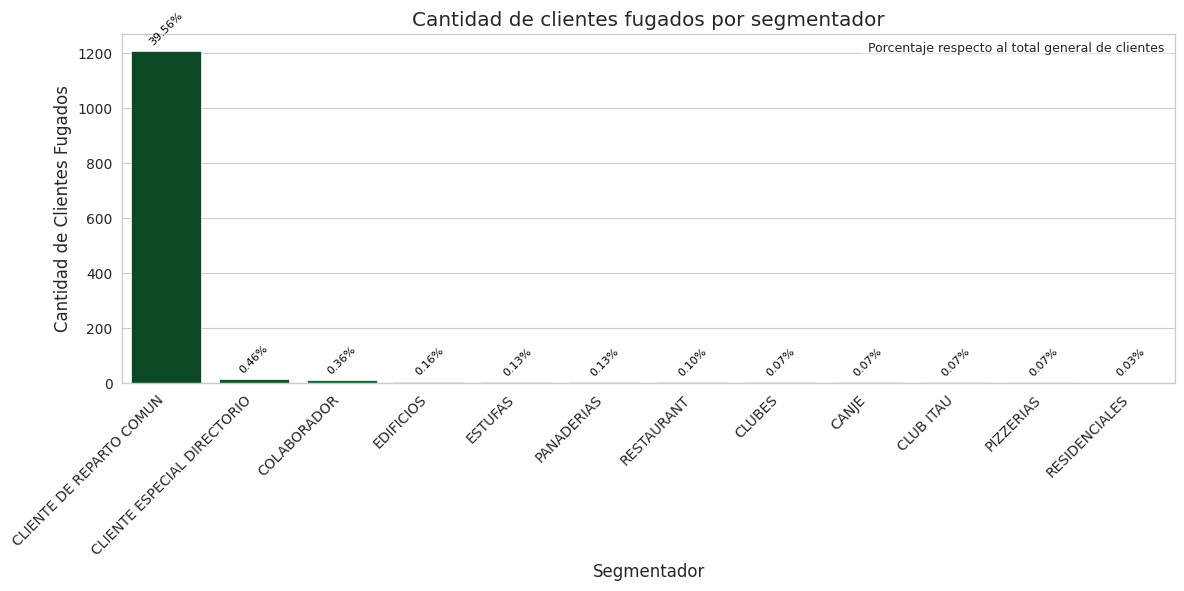

In [85]:
# Filtrar solo los clientes fugados y los segmentadores de interés
df_fugados = df_variables_final[
    (df_variables_final['FUGADO'] == True) &
    (df_variables_final['SEGMENTADOR'].isin(segmentadores_interes))
]

# Contar los clientes fugados por segmentador
fugados_segmentador_counts = df_fugados['SEGMENTADOR'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=fugados_segmentador_counts.index, y=fugados_segmentador_counts.values, palette=paleta_invertida)
plt.title('Cantidad de clientes fugados por segmentador')
plt.xlabel('Segmentador')
plt.ylabel('Cantidad de Clientes Fugados')
plt.xticks(rotation=45, ha='right')

# Mostrar porcentaje sobre cada barra (respecto al total de clientes, no solo fugados)
total_clientes = len(df_variables_final)
for i, valor in enumerate(fugados_segmentador_counts.values):
    porcentaje = f'{100 * valor / total_clientes:.2f}%'
    ax.text(i, valor + total_clientes * 0.005, porcentaje,
            ha='center', va='bottom', fontsize=8, rotation=45, color='black')

# Aclaración sobre el porcentaje
plt.text(0.99, 0.98, 'Porcentaje respecto al total general de clientes',
         transform=plt.gca().transAxes, fontsize=9, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

Este resultado era esperable, ya que CLIENTE DE REPARTO COMÚN es también uno de los segmentos más numerosos.

#### *5.2.5 Relación entre reclamos y clientes fugados*

Este análisis busca explorar si existe una relación entre haber realizado un reclamo y la probabilidad de fuga. Para ello, se construye una tabla de contingencia y dos gráficos de torta para visualizar la distribución de clientes fugados y no fugados según hayan o no hecho reclamos.

FUGADO          False  True   All
TIENE_RECLAMOS                   
0                1732  1198  2930
1                  59    62   121
All              1791  1260  3051


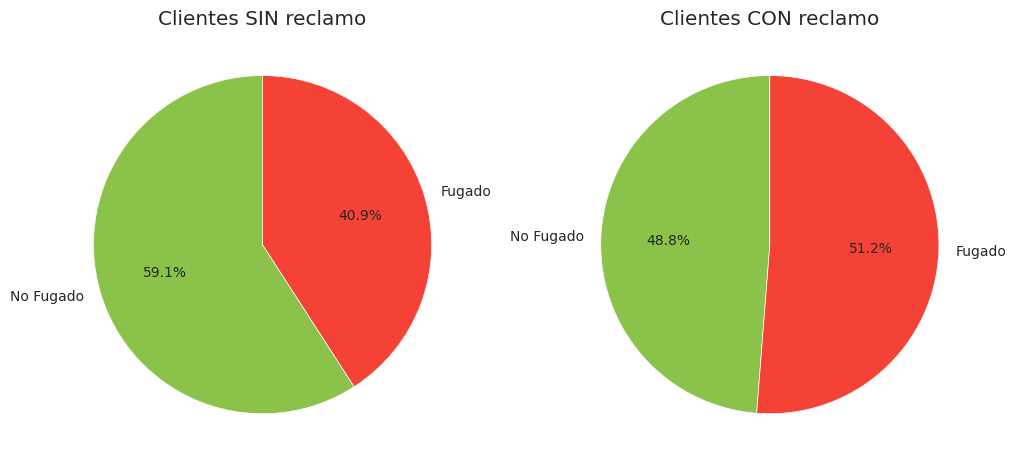

In [86]:
# Tabla de contingencia
tabla_contingencia = pd.crosstab(df_variables_final['TIENE_RECLAMOS'], df_variables_final['FUGADO'], margins=True)
print(tabla_contingencia)

# Agrupar por reclamo y contar fugados y no fugados
datos_pie = df_variables_final.groupby('TIENE_RECLAMOS')['FUGADO'].value_counts(normalize=True).unstack() * 100

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Pie chart para clientes SIN reclamo (TIENE RECLAMO = 0)
axes[0].pie(
    datos_pie.loc[0].fillna(0),
    labels=['No Fugado', 'Fugado'],
    autopct='%1.1f%%',
    colors=['#8bc34a', '#f44336'],
    startangle=90
)
axes[0].set_title('Clientes SIN reclamo')

# Pie chart para clientes CON reclamo (TIENE RECLAMO = 1)
axes[1].pie(
    datos_pie.loc[1].fillna(0),
    labels=['No Fugado', 'Fugado'],
    autopct='%1.1f%%',
    colors=['#8bc34a', '#f44336'],
    startangle=90
)
axes[1].set_title('Clientes CON reclamo')

plt.show()

Entre los clientes que hicieron reclamos, el 51% se fugó, una proporción significativamente mayor que la del grupo que no realizó reclamos, donde solo 40% se fugó.

Aunque la muestra de clientes con reclamos es más pequeña, el hecho de que el porcentaje de fuga sea superior sugiere una posible relación negativa entre la experiencia del cliente y su permanencia.

### *5.3 Análisis multivariado*

#### *5.3.1 Consumo de toneladas por compra según segmentador de clientes fugados*

Este gráfico analiza cómo varía el promedio de toneladas compradas por compra según el segmentador comercial de los clientes que se fugaron. El objetivo es detectar si existen patrones de consumo distintos entre los segmentos comerciales, lo cual podría orientar estrategias de fidelización específicas.

<ipython-input-87-4ad6bb7ac51f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-87-4ad6bb7ac51f>:3: UserWarning: The palette list has more values (20) than needed (12), which may not be intended.
  sns.boxplot(


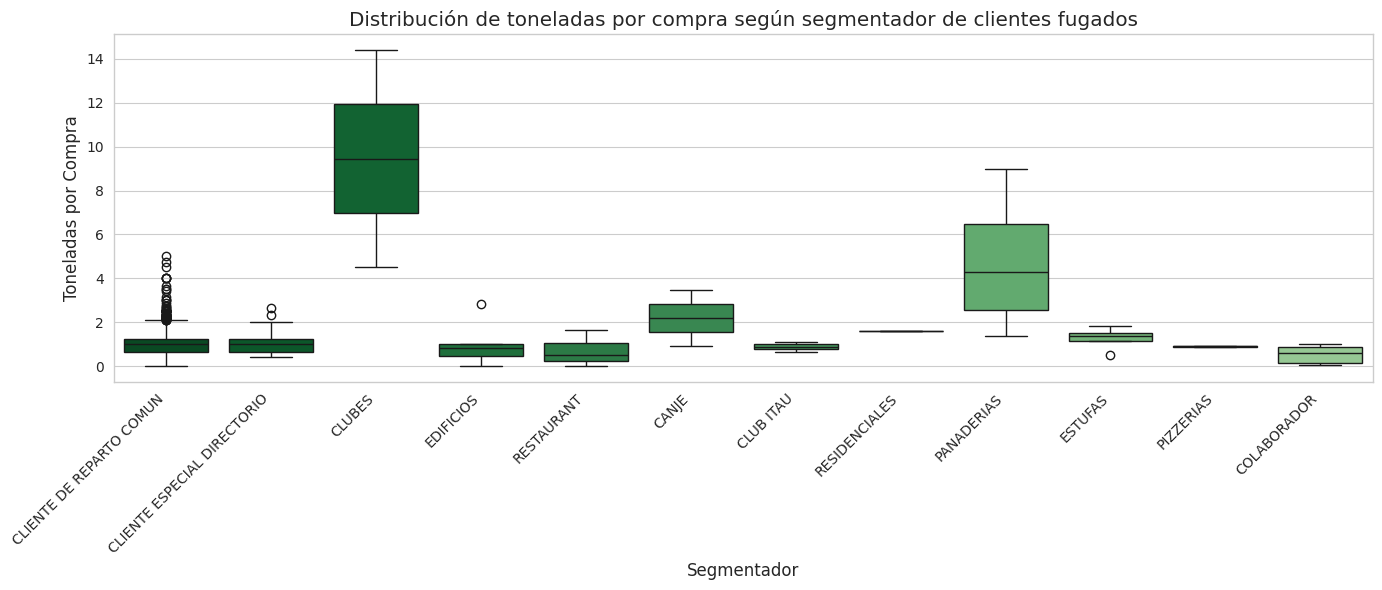

In [87]:
# Boxplot por Segmentador para clientes fugados de interés
plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_fugados,
    x='SEGMENTADOR',
    y='TONELADAS_POR_COMPRA',
    palette=paleta_invertida
)

plt.title('Distribución de toneladas por compra según segmentador de clientes fugados')
plt.xlabel('Segmentador')
plt.ylabel('Toneladas por Compra')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En general, la mayoría de los segmentos presentan una mediana de entre 0 y 2 toneladas por compra, lo que indica un patrón de consumo moderado o bajo. Sin embargo, los segmentos de Clubes y Panaderías destacan con medianas por encima de las 4 toneladas, lo que sugiere que son clientes de alto valor para la empresa.

Esta información es relevante desde el punto de vista comercial, ya que la fuga de clientes en estos segmentos representa una pérdida considerable de volumen de ventas.

#### *5.3.2 Correlaciones de variables numéricas*

Este gráfico permite visualizar las correlaciones lineales entre variables cuantitativas del dataset. Es útil para identificar variables redundantes, relaciones fuertes o inversas, y para anticipar posibles problemas de multicolinealidad o efectos combinados en el modelado.

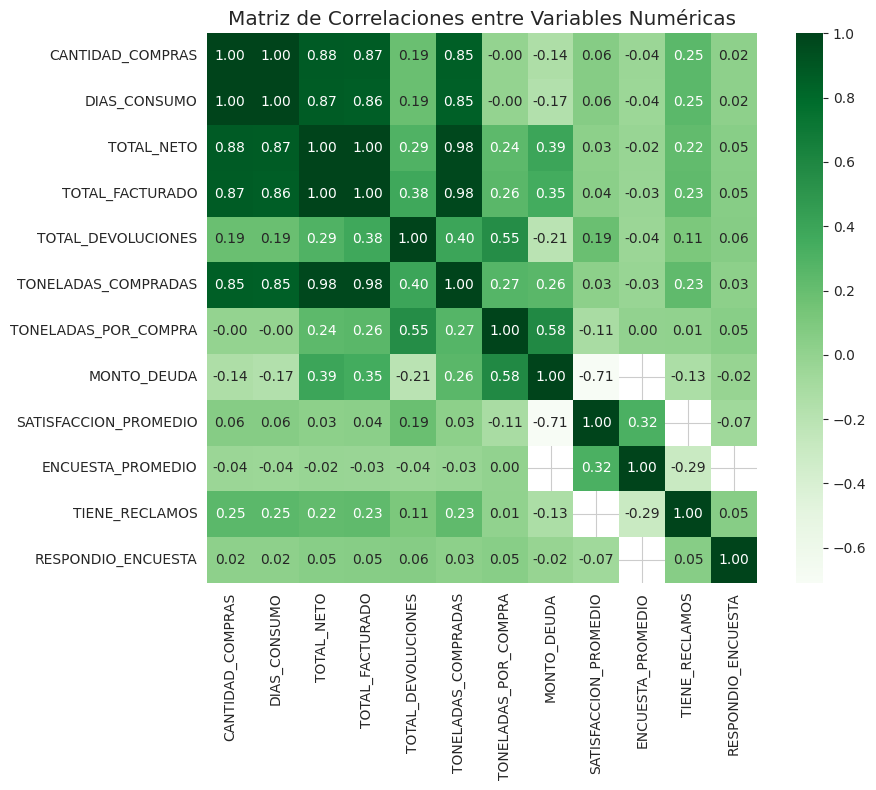

In [ ]:
# Solo las columnas numericas
numericas = df_variables_final.select_dtypes(include=np.number)

plt.figure(figsize=(10,8))
sns.heatmap(numericas.corr(), annot=True, cmap='Greens', fmt=".2f", square=True)
plt.title('Matriz de Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()

- **Altas correlaciones (mayores a 0.80)**

TOTAL_NETO con CANTIDAD_COMPRAS y TONELADAS_COMPRADAS.

- **Correlaciones moderadas (mayores a 0.50)**

TOTAL_DEVOLUCIONES con TONELADAS_COMPRADAS: los clientes que compran más también tienden a tener más devoluciones.

TONELADAS_POR_COMPRA con MONTO_DEUDA: una mayor carga por compra parece estar asociada a deudas más altas.

- **Correlaciones negativas destacadas**

MONTO_DEUDA con TOTAL_DEVOLUCIONES: -0.21 → podría indicar que quienes devuelven productos tienden a tener menos deuda acumulada.

MONTO_DEUDA con SATISFACCION_PROMEDIO: -0.71 → una relación negativa fuerte, lo que sugiere que a mayor deuda, menor satisfacción.

#### *5.3.3 Relación entre deuda y encuesta según clientes fugados*

Este gráfico compara el monto de deuda entre clientes fugados y no fugados, considerando además si respondieron o no la encuesta de satisfacción. El objetivo es evaluar si existen diferencias significativas de deuda entre estos grupos, lo cual puede aportar a la interpretación del comportamiento del cliente.

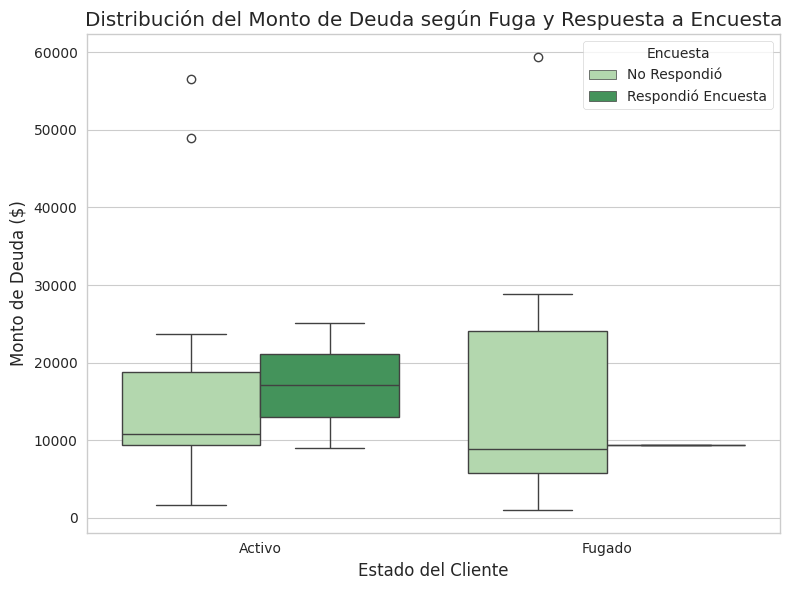

In [ ]:
df_plot = df_variables_final.copy()

# Reemplazar valores booleanos por etiquetas legibles
df_plot['FUGADO'] = df_plot['FUGADO'].map({True: 'Fugado', False: 'Activo'})
df_plot['RESPONDIO_ENCUESTA'] = df_plot['RESPONDIO_ENCUESTA'].map({1: 'Respondió Encuesta', 0: 'No Respondió'})

plt.figure(figsize=(8,6))
sns.boxplot(data=df_plot, x='FUGADO', y='MONTO_DEUDA', hue='RESPONDIO_ENCUESTA', palette='Greens')
plt.title('Distribución del Monto de Deuda según Fuga y Respuesta a Encuesta')
plt.xlabel('Estado del Cliente')
plt.ylabel('Monto de Deuda ($)')
plt.legend(title='Encuesta')
plt.tight_layout()
plt.show()

Los clientes fugados que no respondieron la encuesta muestran una mayor dispersión en el monto de deuda, con valores más extremos.

Aquellos que respondieron la encuesta, tanto fugados como activos, tienden a tener una deuda más baja y estable.

Se sugiere que la participación en la encuesta podría estar asociada a un mayor compromiso del cliente y, posiblemente, a una mejor relación comercial.

La combinación de fuga + deuda alta + no respuesta podría indicar un perfil de riesgo: clientes con baja interacción, insatisfacción no reportada y situación financiera comprometida.

#### *5.3.4 Relación entre cantidad de compras y monto promedio de compra de clientes finales fugados*

Este gráfico de dispersión compara la frecuencia de compras con el monto promedio por compra, segmentando a los clientes de tipo CLIENTE DE REPARTO COMUN según su condición de fugado o activo. El objetivo es identificar si existe un patrón en el comportamiento de fuga dentro de este grupo, que representa a los clientes finales más comunes de la empresa.

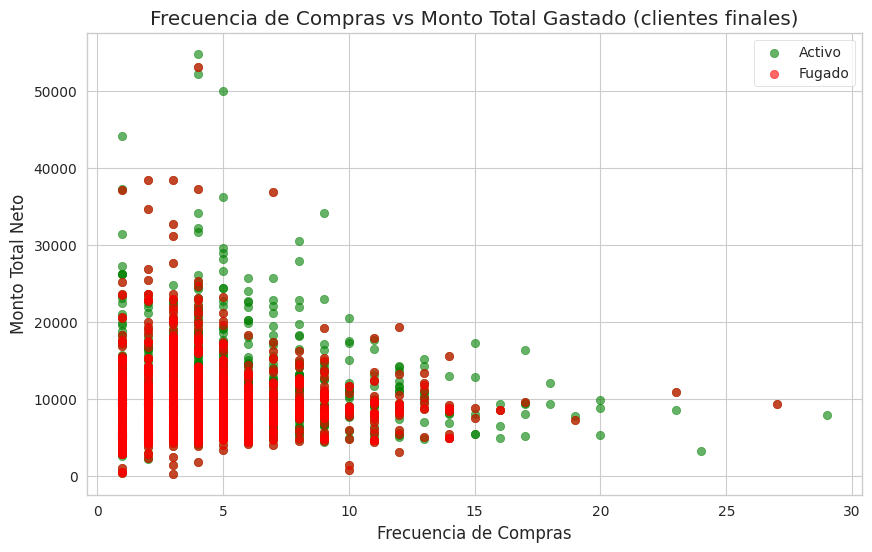

In [ ]:
df_variables_final['MONTO_PROMEDIO_POR_COMPRA'] = df_variables_final['TOTAL_NETO'] / df_variables_final['CANTIDAD_COMPRAS']

# Filtro base para clientes activos y segmento específico
filtro_activos = (df_variables_final['ACTIVO'] == True) & (df_variables_final['SEGMENTADOR'] == 'CLIENTE DE REPARTO COMUN')
filtro_fugados = (df_variables_final['FUGADO'] == True) & (df_variables_final['SEGMENTADOR'] == 'CLIENTE DE REPARTO COMUN')

plt.figure(figsize=(10,6))

plt.scatter(
    df_variables_final.loc[filtro_activos, 'CANTIDAD_COMPRAS'],
    df_variables_final.loc[filtro_activos, 'MONTO_PROMEDIO_POR_COMPRA'],
    color='green', label='Activo', alpha=0.6
)

plt.scatter(
    df_variables_final.loc[filtro_fugados, 'CANTIDAD_COMPRAS'],
    df_variables_final.loc[filtro_fugados, 'MONTO_PROMEDIO_POR_COMPRA'],
    color='red', label='Fugado', alpha=0.6
)

plt.title('Frecuencia de Compras vs Monto Promedio por Compra (clientes finales)')
plt.xlabel('Frecuencia de Compras')
plt.ylabel('Monto Promedio por Compra')

plt.legend()
plt.grid(True)
plt.show()


Los clientes fugados tienden a concentrarse en la parte inferior izquierda del gráfico, es decir, tienen pocas compras y un monto promedio bajo, lo que refuerza la hipótesis de que estos perfiles son más propensos a abandonar la empresa.

Los clientes activos presentan una mayor dispersión, con algunos casos de alta frecuencia de compra y/o montos promedio más elevados, lo que indica una relación comercial más fuerte y estable.

La combinación de frecuencia baja + monto bajo es un patrón característico de fuga en este tipo de cliente, lo cual puede utilizarse como señal de alerta en un sistema preventivo.

#### *5.3.5 Cantidad de Clientes y Promedio de Satisfacción según Estado de Fuga*

Este gráfico doble combina dos métricas clave para evaluar la relación entre la fuga de clientes y su nivel de satisfacción general según encuestas. Por un lado, muestra la cantidad de clientes que respondieron la encuesta en función de si se fugaron o no. Por otro, traza la media de satisfacción dentro de cada grupo, permitiendo evaluar si el nivel de satisfacción predice la fuga.

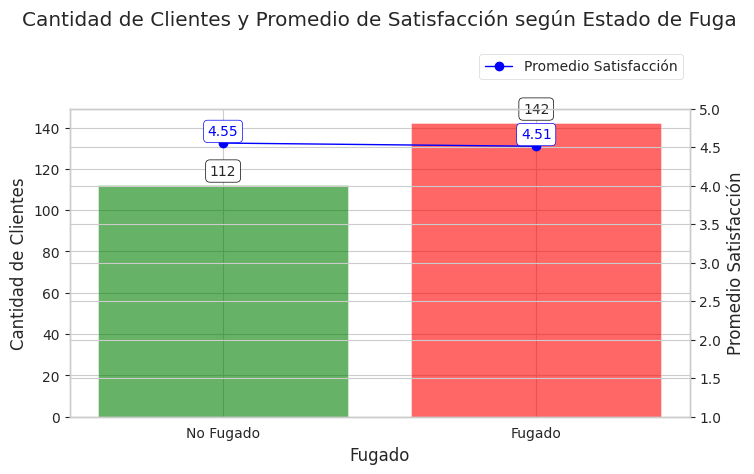

In [ ]:
# Filtrar solo clientes que respondieron encuesta para análisis de satisfacción
df_encuestas = df_variables_final[df_variables_final['RESPONDIO_ENCUESTA'] == True].copy()

# Preparar datos
tabla_fuga = df_encuestas['FUGADO'].value_counts().sort_index()
tabla_prom = df_encuestas.groupby('FUGADO')['ENCUESTA_PROMEDIO'].mean().sort_index()
fig, ax1 = plt.subplots(figsize=(8,4))

# Barras: cantidad de clientes
bars = ax1.bar(tabla_fuga.index, tabla_fuga.values, color=['green', 'red'], alpha=0.6)
ax1.set_xlabel('Fugado')
ax1.set_ylabel('Cantidad de Clientes')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['No Fugado', 'Fugado'])

# Agregar etiquetas de cantidad encima de barras con recuadro
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2, height + 5, f'{height}',
        ha='center', fontsize=10,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

# Crear segundo eje para promedio de satisfacción
ax2 = ax1.twinx()
ax2.plot(tabla_prom.index, tabla_prom.values, color='blue', marker='o', linewidth=1, label='Promedio Satisfacción')
ax2.set_ylabel('Promedio Satisfacción')
ax2.set_ylim(1, 5)  # Ajusta según escala de tu encuesta

# Agregar etiquetas con el valor del promedio en cada punto con recuadro
for i, v in enumerate(tabla_prom.values):
    ax2.text(
        i, v + 0.1, f"{v:.2f}", color='blue', ha='center', fontsize=10,
        bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3')
    )

plt.title('Cantidad de Clientes y Promedio de Satisfacción según Estado de Fuga', pad=60)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1.2))
plt.show()

La cantidad de clientes fugados que respondieron la encuesta (142) es mayor que la de clientes no fugados (112), lo cual podría indicar que, en algunos casos, la respuesta a la encuesta no se asocia necesariamente a la permanencia, y podría incluso reflejar quejas o insatisfacción.

El promedio de satisfacción es más alto en los clientes activos, lo que respalda la hipótesis de que la satisfacción está positivamente asociada a la retención.

## **🧠 6- Modelado Predictivo**

### *6.1 Librerías*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_recall_curve, f1_score

### *6.2 Seleccionar variables relevantes para el modelo*


In [ ]:
variables_modelo = [
    'CANTIDAD_COMPRAS',
    'TONELADAS_POR_COMPRA',
    'ZONA',
    'SEGMENTADOR',
    'ACTIVO'
]

df_modelo = df_variables_final[variables_modelo + ['FUGADO']].copy()

### *6.3 Definir columnas numéricas y categóricas*

In [ ]:
X = df_modelo.drop('FUGADO', axis=1)
y = df_modelo['FUGADO'].astype(int)  # convertir a 0/1 si es booleano

num_cols = ['CANTIDAD_COMPRAS', 'TONELADAS_POR_COMPRA', 'ACTIVO']
cat_cols = ['ZONA', 'SEGMENTADOR']

### *6.4 Preprocesamiento*

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

### *6.5 Dividir en entrenamiento y prueba*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Tamaño train: {X_train.shape}, tamaño test: {X_test.shape}')

Tamaño train: (2440, 5), tamaño test: (611, 5)


### *6.6 Entrenamiento*

In [ ]:
# Crear pipeline con preprocesamiento y modelo
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entrenar modelo
clf.fit(X_train, y_train)

# Predecir sobre test
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluar resultados
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print(f"AUC ROC: {roc_auc_score(y_test, y_proba):.3f}")

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.72      0.76       359
           1       0.65      0.73      0.69       252

    accuracy                           0.73       611
   macro avg       0.72      0.73      0.72       611
weighted avg       0.73      0.73      0.73       611

Matriz de confusión:
[[259 100]
 [ 67 185]]
AUC ROC: 0.806


In [ ]:
X_train.select_dtypes(include='object').columns

Index(['ZONA', 'SEGMENTADOR'], dtype='object')

In [ ]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

In [ ]:
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_encoded, y_train)

y_pred = rf.predict(X_test_encoded)

In [ ]:
# Evaluación

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# AUC si además calculaste y_prob
y_prob = rf.predict_proba(X_test_encoded)[:, 1]
print("AUC ROC:", roc_auc_score(y_test, y_prob))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       359
           1       0.64      0.73      0.68       252

    accuracy                           0.72       611
   macro avg       0.72      0.72      0.72       611
weighted avg       0.73      0.72      0.72       611

Matriz de confusión:
[[255 104]
 [ 67 185]]
AUC ROC: 0.8023334217623911


### *6.7 Feature Selection*

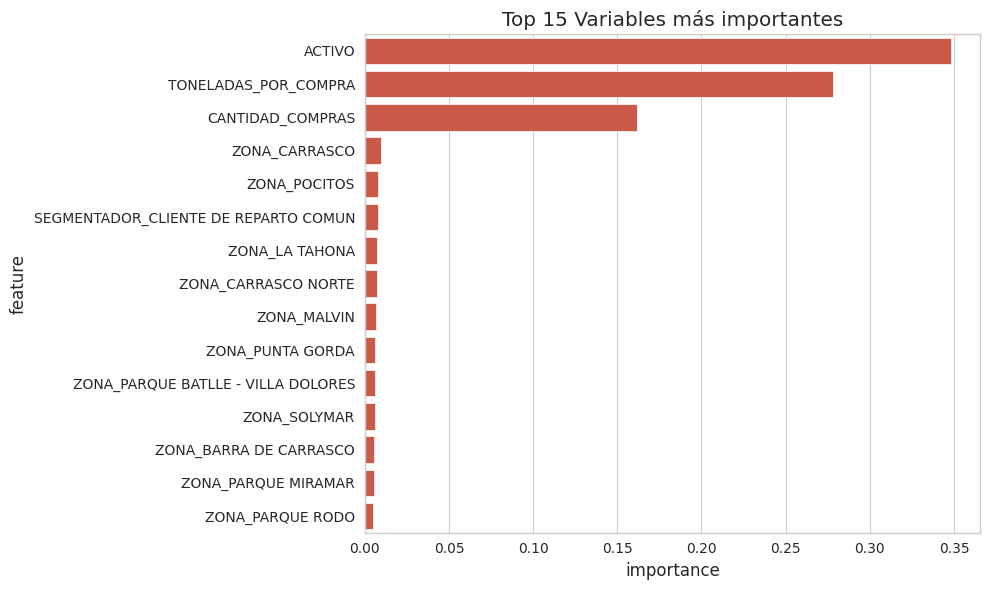

In [ ]:
importances = rf.feature_importances_
features = X_train_encoded.columns
feature_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_df = feature_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_df.head(15))
plt.title('Top 15 Variables más importantes')
plt.tight_layout()
plt.show()

### *6.8 Random Forest*

In [ ]:
# Seleccionar solo las 3 variables importantes
features = ['ACTIVO', 'TONELADAS_POR_COMPRA', 'CANTIDAD_COMPRAS']

X_train_reducido = X_train[features]
X_test_reducido = X_test[features]

# Entrenar Random Forest con solo estas variables
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_reducido, y_train)

# Predecir en test
y_pred = rf.predict(X_test_reducido)

# Evaluar modelo
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Calcular AUC ROC
y_prob = rf.predict_proba(X_test_reducido)[:,1]
print("AUC ROC:", roc_auc_score(y_test, y_prob))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       359
           1       0.65      0.82      0.73       252

    accuracy                           0.74       611
   macro avg       0.75      0.76      0.74       611
weighted avg       0.76      0.74      0.75       611

Matriz de confusión:
[[249 110]
 [ 46 206]]
AUC ROC: 0.8102367688022284


In [ ]:
# Ajustar el umbral de decisión

# Obtener las probabilidades de la clase positiva (fuga)
probs = rf.predict_proba(X_test_encoded)[:, 1]

# Ajustar umbral a 0.3
umbral = 0.3
y_pred_adjusted = (probs >= umbral).astype(int)

# Evaluar con el nuevo umbral
print(classification_report(y_test, y_pred_adjusted))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("AUC ROC:", roc_auc_score(y_test, probs))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74       359
           1       0.63      0.89      0.74       252

    accuracy                           0.74       611
   macro avg       0.76      0.76      0.74       611
weighted avg       0.78      0.74      0.74       611

Matriz de confusión:
[[226 133]
 [ 27 225]]
AUC ROC: 0.8023334217623911


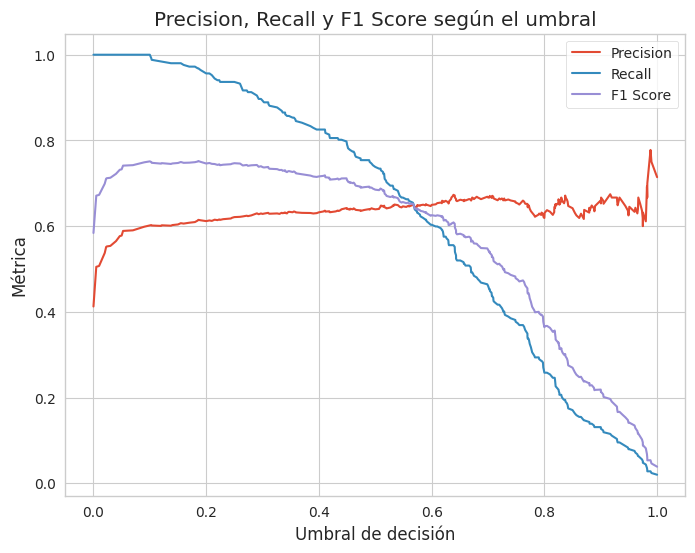

In [ ]:
#  probabilidades de clase positiva
probs = rf.predict_proba(X_test_encoded)[:, 1]

#  precisión, recall y umbrales
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Calcular F1 para cada umbral (menos el último, que no corresponde a un umbral)
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores = f1_scores[:-1]  # quitar último para que coincida con thresholds

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')

plt.xlabel('Umbral de decisión')
plt.ylabel('Métrica')
plt.title('Precision, Recall y F1 Score según el umbral')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]
print(f'Umbral óptimo (max F1): {optimal_threshold:.2f} con F1={f1_scores[optimal_idx]:.2f}')

y_pred_optimal = (probs >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal))

Umbral óptimo (max F1): 0.19 con F1=0.75
              precision    recall  f1-score   support

           0       0.96      0.57      0.72       359
           1       0.61      0.97      0.75       252

    accuracy                           0.74       611
   macro avg       0.79      0.77      0.74       611
weighted avg       0.82      0.74      0.73       611



## **📝 7- Conclusiones**

En este proyecto se desarrolló un modelo de clasificación para predecir la fuga de clientes, definida como la ausencia de compras en los últimos seis meses.

El modelo Random Forest seleccionado logró un desempeño satisfactorio con una precisión cercana al 74% y un área bajo la curva ROC (AUC) de aproximadamente 0.81, lo que indica una buena capacidad para distinguir entre clientes que permanecen activos y los que fugarán.

Se observó que las variables más relevantes para la predicción fueron activo (compra en los últimos 18 meses), toneladas por compra y cantidad de compras, confirmando que el comportamiento reciente de compra es un fuerte indicador de retención.

Al ajustar el umbral de clasificación a 0.3, se priorizó el recall para la clase de fuga, aumentando la capacidad del modelo para detectar clientes que podrían abandonar, aunque esto puede reducir la precisión y aumentar falsos positivos. Esta decisión es estratégica, dado que para la empresa es más importante identificar correctamente a posibles fugas para actuar preventivamente.

Entre las limitaciones del análisis se encuentra la posible ausencia de variables externas que influyan en la fuga, y la necesidad de evaluar el modelo en un entorno real para medir el impacto de intervenciones basadas en la predicción.

En resumen, este trabajo demuestra que es posible predecir con cierto nivel de certeza la fuga de clientes utilizando variables de comportamiento de compra, lo cual puede apoyar la toma de decisiones y estrategias de retención en la empresa.